In [2]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import glob
import time
import pandas as pd
from statistics import mean

print (time.ctime())

Thu Oct 15 22:19:31 2020


In [29]:
# file1 = "/home/imaginglab/Data/TPX3/CHIP0/Test/8x8Grid_visEq_1s_W0028_F03-200228-095644-1.csv"
file1 ="/QuantumRouter/AOD1072020/AOD_10s_blnkint_PL_1kHz_10ns_SingleSpot_0thOrder_W0028_H07-201007-113404-1.csv"
print (file1, time.ctime())

# data1=np.loadtxt(file1, dtype= float, delimiter=",", usecols = (0,1,2,3,4))
# data1 = np.genfromtxt(file1, delimiter=",", skip_header=True)[:, 1:]
data1 = pd.read_csv(file1)
print(pd.read_csv(file1, nrows=5))
print(time.ctime())
# #print data
# y1   = data1.iloc[:, 0]
# x1   = data1.iloc[:, 1]
# t1   = data1.iloc[:, 2]
# a1   = data1.iloc[:, 3]
# A1   = data1.iloc[:, 4]

# for i in range(0,20):
#     print (i, x1[i],y1[i],t1[i],a1[i],A1[i])
    
# print (len(t1), time.ctime())

# file2 = "/home/imaginglab/Data/TPX3/CHIP0/Test/8x8Grid_SettingsEq_1s_W0028_F03-200228-100050-1.csv"
file2 = "/QuantumRouter/AOD1072020/AOD_10s_blnkint_PL_1kHz_10ns_SingleSpot_0thOrder_W0028_H07-201007-113404-1_cent.csv"
print (file2, time.ctime())

# data2=np.loadtxt(file2, dtype= float, delimiter=",", usecols = (0,1,2,3,4))
# data2 = np.genfromtxt(file2, delimiter=",", skip_header=True)[:, 1:]
data2 =pd.read_csv(file2)
print(pd.read_csv(file2, nrows=5))
print(time.ctime())
# #print data
# y2  = data2.iloc[:, 0]
# x2  = data2.iloc[:, 1]
# t2  = data2.iloc[:, 2]
# a2  = data2.iloc[:, 3]
# A2  = data2.iloc[:, 4]

# for i in range(0,20):
#     print (i, x2[i],y2[i],t2[i],a2[i],A2[i])
    
# print (len(t2), time.ctime())

/QuantumRouter/AOD1072020/AOD_10s_blnkint_PL_1kHz_10ns_SingleSpot_0thOrder_W0028_H07-201007-113404-1.csv Thu Oct 15 22:38:27 2020
   #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
0   235    24  158657210368        450         2243225         NaN
1   232    26  158657210368        950         2243225         NaN
2   233    27  158657210368       1775         2243225         NaN
3   235    25  158657210368        600         2243225         NaN
4   234    26  158657210368      17400         2243225         NaN
Thu Oct 15 22:38:40 2020
/QuantumRouter/AOD1072020/AOD_10s_blnkint_PL_1kHz_10ns_SingleSpot_0thOrder_W0028_H07-201007-113404-1_cent.csv Thu Oct 15 22:38:40 2020
   #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  Unnamed: 6
0   235    24  158657210368        450         2243225       2641         NaN
1   143    26  158657214720      21625          758350       1127         NaN
2   143   123  158657216256      10725           53375         75         

In [5]:
data1.shape, data2.shape

((423264, 7), (39687012, 6))

In [30]:
# # file1 ="/QuantumRouter/AOD8212020/AOM_64_10kHz_ext_W0028_H07-140105-025044-1.csv"
# GridX1min = 146
# GridX1max = 191
# GridY1min = 82
# GridY1max = 127

# # file1 ="/QuantumRouter/AOD9282020/AOD_10s_blnkext_10kHz_10Dty_3.3Vpp_W0057_H07-140212-034958-1_cent.csv"
# GridX1min = 30
# GridX1max = 75
# GridY1min = 185
# GridY1max = 230

# file1 ="/QuantumRouter/AOD1012020/AOD_10s_blnkint_PL_1kHz_10ns_W0028_H07-201001-114131-1_cent.csv"
# GridX1min = 67
# GridX1max = 109
# GridY1min = 151
# GridY1max = 193

# file1 = "/QuantumRouter/AOD1072020/AOD_10s_blnkint_PL_1kHz_10ns_0thOrder_W0028_H07-201007-112751-1_cent.csv"
GridX1min = 122
GridX1max = 166
GridY1min = 107
GridY1max = 151

# # file2 = "/QuantumRouter/AOD8212020/AOM_64n_10kHz_ext_W0028_H07-140105-025447-1.csv"
# GridX2min = 62
# GridX2max = 107
# GridY2min = 161
# GridY2max = 206

# # file2 = "/QuantumRouter/AOD9282020/AOD_10s_blnkext_10kHz_10Dty_3.3Vpp_W0057_H07-140212-034958-1.csv"
# GridX2min = 30
# GridX2max = 75
# GridY2min = 185
# GridY2max = 230

# file2 ="/QuantumRouter/AOD1012020/AOD_10s_blnkint_PL_1kHz_10ns_W0028_H07-201001-114131-1.csv"
# GridX2min = 67
# GridX2max = 109
# GridY2min = 151
# GridY2max = 193

# file2 = "/QuantumRouter/AOD1072020/AOD_10s_blnkint_PL_1kHz_10ns_0thOrder_W0028_H07-201007-112751-1.csv"
GridX2min = 122
GridX2max = 166
GridY2min = 107
GridY2max = 151

In [109]:
122+42, 107+42

(164, 149)

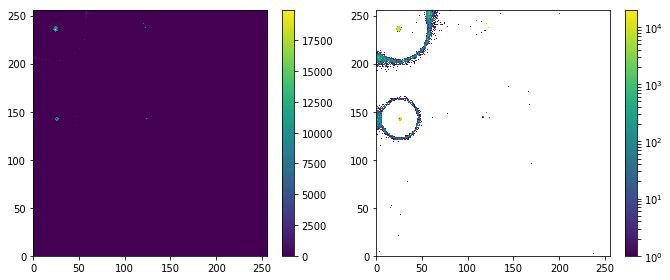

In [156]:
#File 1 grid
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(data1['#Row'], data1['#Col'], bins = 256, range = [(0, 256), (0, 256)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(data1['#Row'], data1['#Col'], bins = 256, range = [(0, 256), (0, 256)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)
fig.tight_layout()
plt.show()

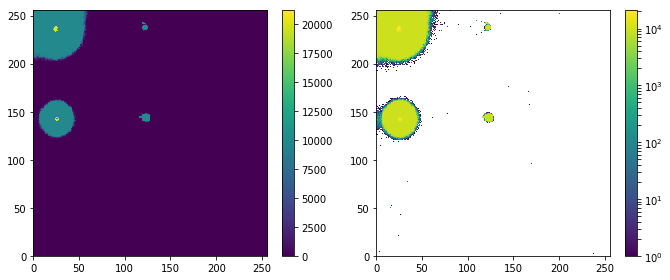

In [157]:
#File 2 grid
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(data2['#Row'], data2['#Col'], bins = 256, range = [(0, 256), (0, 256)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(data2['#Row'], data2['#Col'], bins = 256, range = [(0, 256), (0, 256)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)
fig.tight_layout()
plt.show()

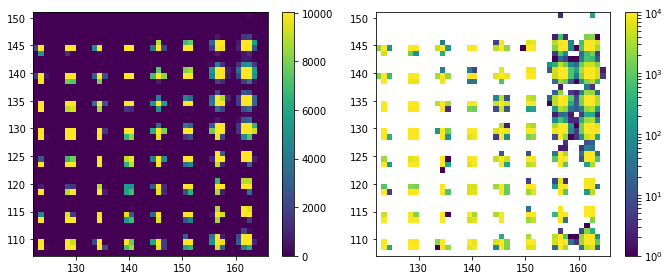

In [82]:
#File 1 grid

# GridX1min = 145
# GridX1max = 180
# GridY1min = 80
# GridY1max = 125

# GridX1min = 60
# GridX1max = 105
# GridY1min = 155
# GridY1max = 198

# file1 ="/QuantumRouter/AOD8252020/AOD_blnkext_10kHz_20Dty_10sW0028_H07-140109-221335-1.csv"
# GridX1min = 100
# GridX1max = 150
# GridY1min = 110
# GridY1max = 160

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(data1['#Row'], data1['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(data1['#Row'], data1['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

fig.tight_layout()
plt.show()
# fig.savefig('fullgrid_8212020_025044-1_cent.png')

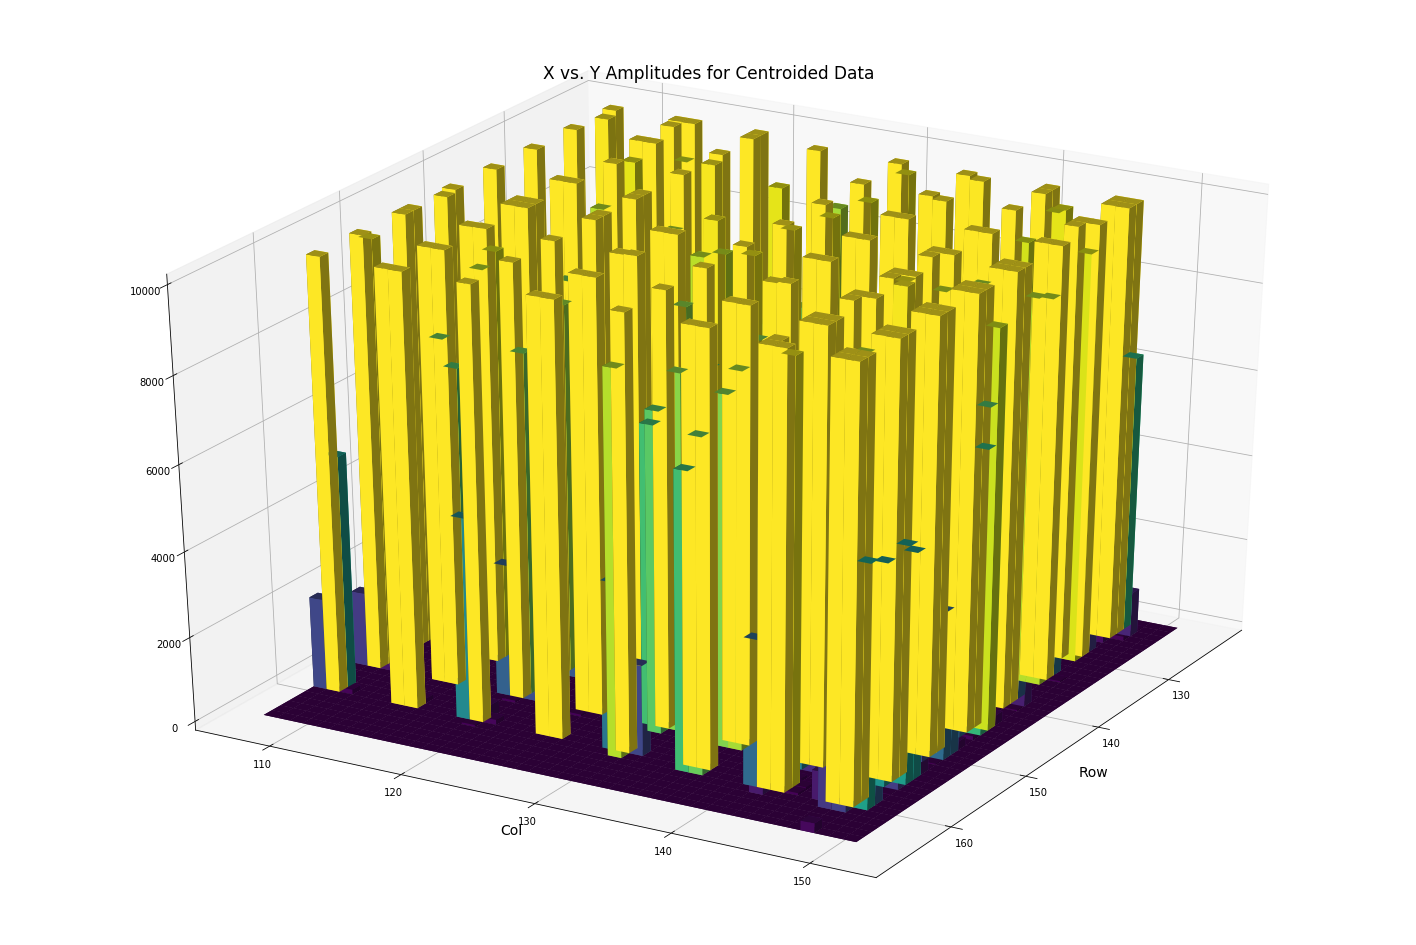

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

In [83]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
fig = plt.figure(figsize=(25,17))
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(data1['#Row'], data1['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])
# xpos = xpos.ravel()
# ypos = ypos.ravel()
# zpos = 0
xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)

# Construct arrays with the dimensions for the 16 bars.
# dx = dy = 0.5 * np.ones_like(zpos)
# dz = hist.ravel()
dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

cmap = cm.get_cmap('viridis') # Get desired colormap - you can change this!
max_height = np.max(dz)   # get range of colorbars so we can normalize
min_height = np.min(dz)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in dz] 


ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
plt.title("X vs. Y Amplitudes for Centroided Data",fontsize = 17)
plt.xlabel("Row", fontsize = 14)
plt.ylabel("Col", fontsize = 14)
# plt.savefig("3d_XY_Centroid_1012020_114131-1_cent",  bbox_inches='tight')
for angle in range(30, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

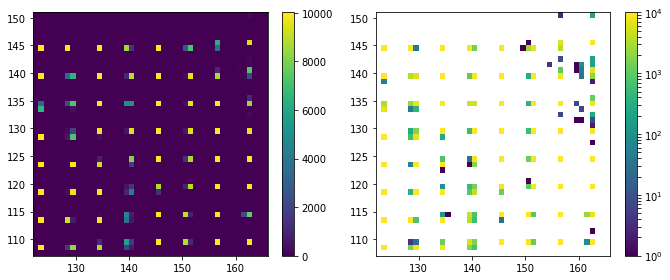

In [84]:
#File 2 grid

# GridX2min = 62
# GridX2max = 107
# GridY2min = 161
# GridY2max = 206

# GridX2min = 60
# GridX2max = 105
# GridY2min = 155
# GridY2max = 198

# file2 = "/QuantumRouter/AOD8212020/AOM_64_10kHz_ext_W0028_H07-140105-025044-1.csv"
# GridX2min = 145
# GridX2max = 180
# GridY2min = 80
# GridY2max = 125

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(data2['#Row'], data2['#Col'], bins = GridX2max-GridX2min, range = [(GridX2min, GridX2max), (GridY2min, GridY2max)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(data2['#Row'], data2['#Col'], bins = GridX2max-GridX2min, range = [(GridX2min, GridX2max), (GridY2min, GridY2max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

fig.tight_layout()
plt.show()
# fig.savefig('fullgrid_8212020_025447-1_cent.png')

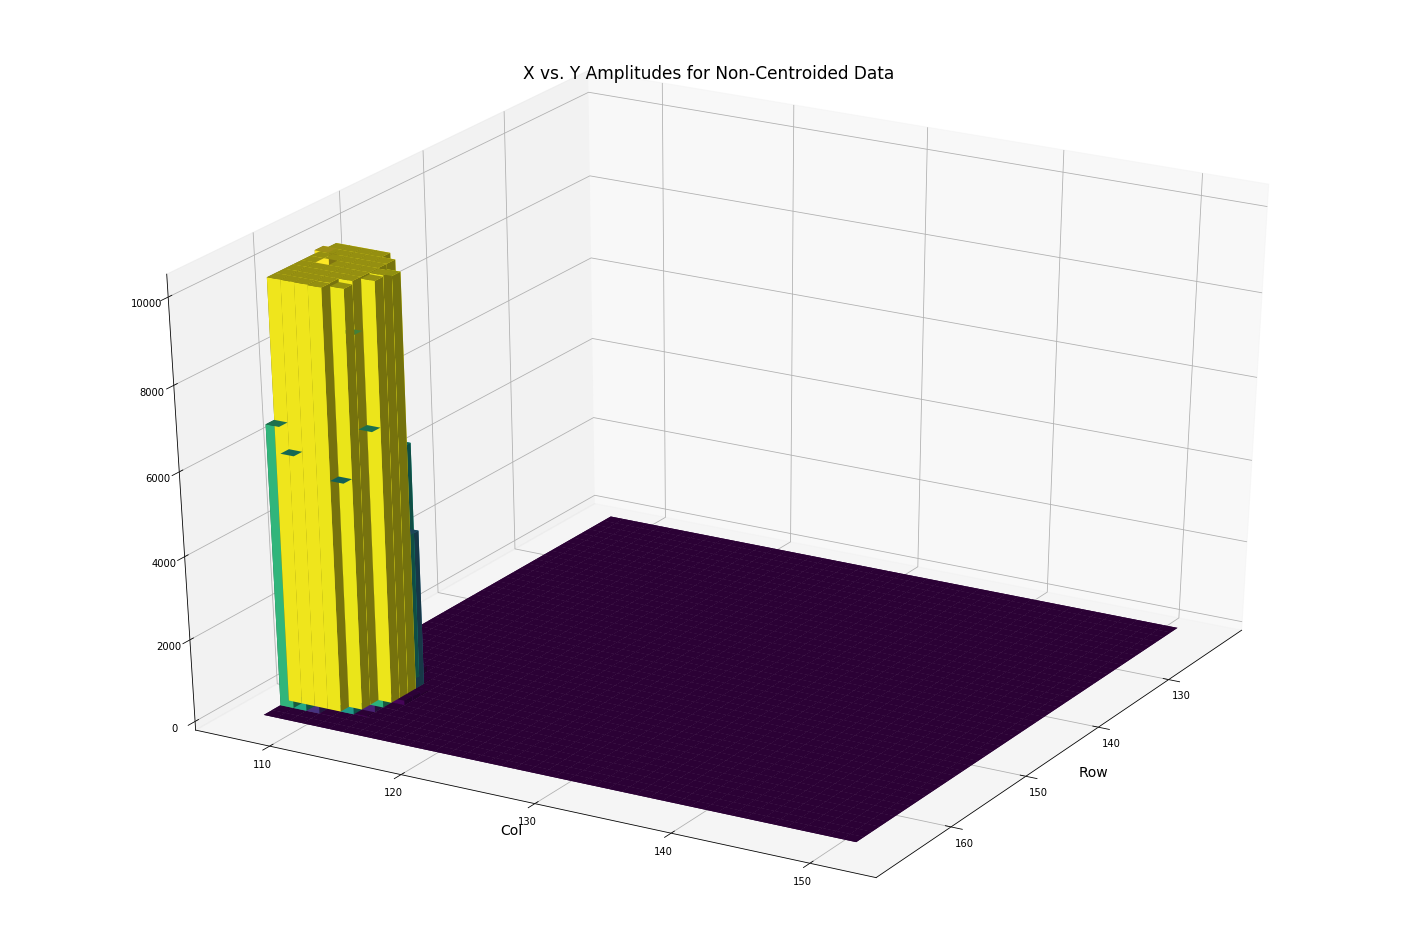

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

In [230]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
fig = plt.figure(figsize=(25,17))
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(data2['#Row'], data2['#Col'], bins = GridX2max-GridX2min, range = [(GridX2min, GridX2max), (GridY2min, GridY2max)])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])
# xpos = xpos.ravel()
# ypos = ypos.ravel()
# zpos = 0
xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)

# Construct arrays with the dimensions for the 16 bars.
# dx = dy = 0.5 * np.ones_like(zpos)
# dz = hist.ravel()
dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

cmap = cm.get_cmap('viridis') # Get desired colormap - you can change this!
max_height = np.max(dz)   # get range of colorbars so we can normalize
min_height = np.min(dz)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in dz] 


ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
plt.title("X vs. Y Amplitudes for Non-Centroided Data", fontsize=17)
plt.xlabel("Row", fontsize=14)
plt.ylabel("Col", fontsize=14)
# plt.savefig("3d_XY_Centroid_1012020_114131-1",  bbox_inches='tight')
for angle in range(30, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

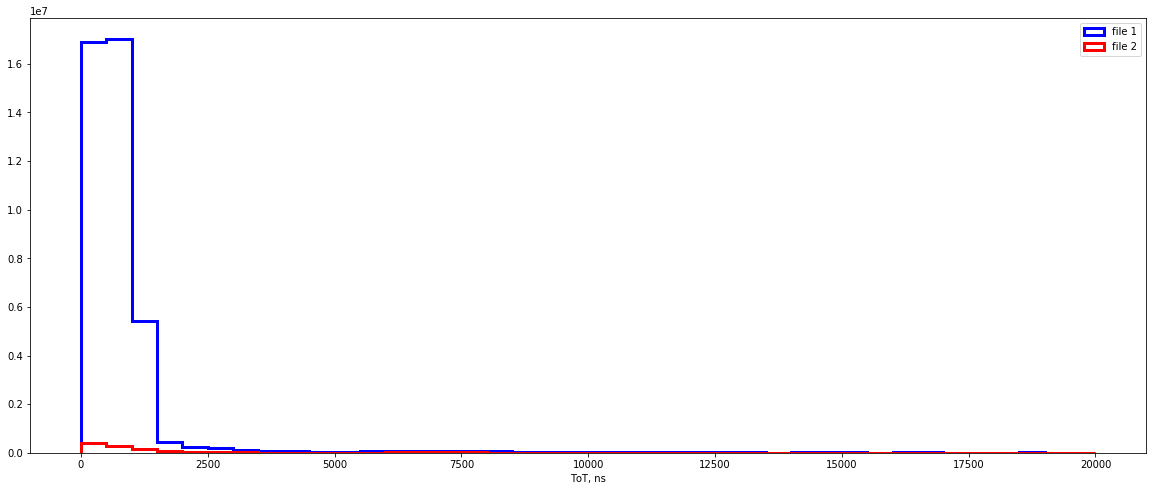

In [86]:
fig, ax1 = plt.subplots(ncols=1, figsize=(20, 8))

nbins = 40

plt.hist(data1['#ToT[arb]'], bins= nbins, range = [0, 20000], lw=3, histtype='step', label = 'file 1', color = 'blue')
plt.hist(data2['#ToT[arb]'], bins= nbins, range = [0, 20000], lw=3, histtype='step', label = 'file 2', color = 'red')

plt.xlabel('ToT, ns')
plt.legend()
plt.show()
# fig.savefig('TOT_025044-1_cent_vs_025447-1_cent_8212020.png')

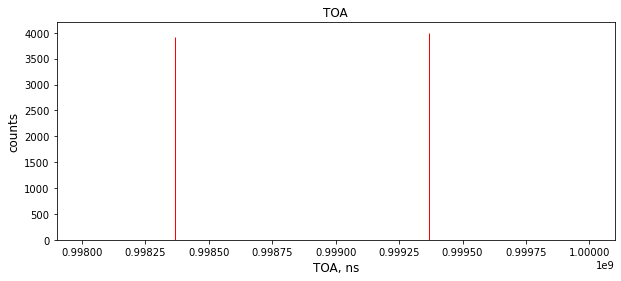

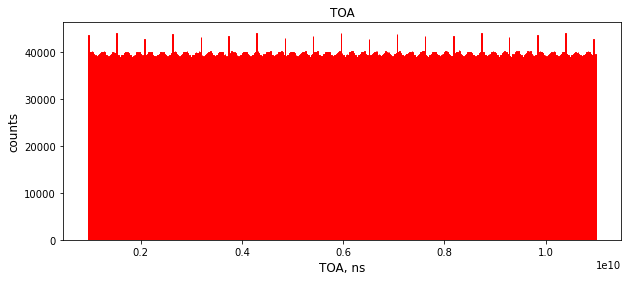

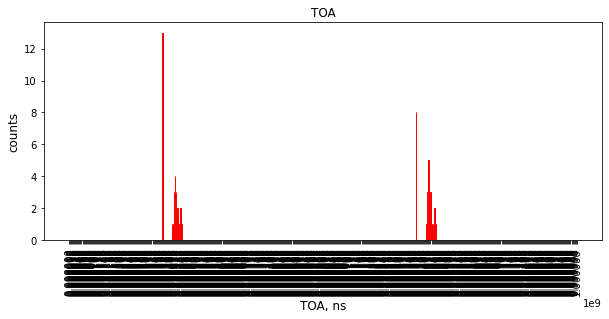

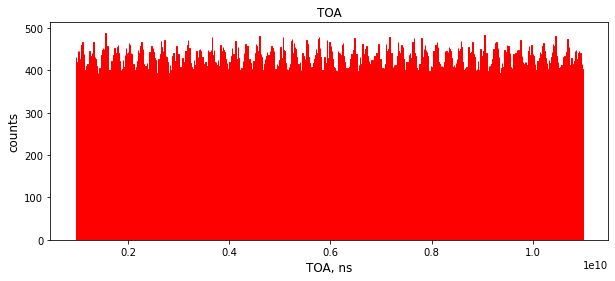

In [49]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
(n, bins, patches) = plt.hist(data1['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
# plt.xticks(bins)
plt.show()
# fig.savefig('TOA_256x256_8212020_025044-1_cent.png')


fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
(n, bins, patches) = plt.hist(data1['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
# plt.xticks(bins)
plt.show()

# Extinction Ratio


#fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
#plt.hist(tt/4096.*25., bins = 100, color = 'r', ec = 'k')
#plt.title("TOA", fontsize = 12) # change the title
#plt.xlabel('TOA, ns',fontsize = 12)
#plt.ylabel('counts',fontsize = 12)
#plt.show()

# fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
# #plt.hist(t/4096.*25., bins = 10, range = (0.5E+9, 1.5E+9), color = 'r', ec = 'k')
# plt.hist(data1['#ToA']/4096.*25., bins = 1000, range = (-1.E+9, 1.E+9), color = 'r', ec = 'r')
# plt.title("TOA", fontsize = 12) # change the title
# plt.xlabel('TOA, ns',fontsize = 12)
# plt.ylabel('counts',fontsize = 12)
# plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
(n, bins, patches) = plt.hist(data2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.xticks(bins[::2], rotation='vertical')
plt.show()
# fig.savefig('TOA_256x256_8212020_025447-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(data2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

#fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
#plt.hist(tt/4096.*25., bins = 100, color = 'r', ec = 'k')
#plt.title("TOA", fontsize = 12) # change the title
#plt.xlabel('TOA, ns',fontsize = 12)
#plt.ylabel('counts',fontsize = 12)
#plt.show()

# fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
# #plt.hist(t/4096.*25., bins = 10, range = (0.5E+9, 1.5E+9), color = 'r', ec = 'k')
# plt.hist(data2['#ToA']/4096.*25., bins = 1000, range = (-1.E+9, 1.E+9), color = 'r', ec = 'r')
# plt.title("TOA", fontsize = 12) # change the title
# plt.xlabel('TOA, ns',fontsize = 12)
# plt.ylabel('counts',fontsize = 12)
# plt.show()


### Diffraction Efficiency

In [229]:
# for 1072020 singlespot data
# 10ns
C1R8ToTavg = 10412.900563216159
_0thToTavg = 6089.60193080843
Y1stToTavg = 5987.0528072682728
X1stToTavg = 44.44444444444444
print("Y/0th:", Y1stToTavg/_0thToTavg)
print("X/0th:", X1stToTavg/_0thToTavg)
print("grid spots/non-grid spots:", C1R8ToTavg/(_0thToTavg+Y1stToTavg+X1stToTavg))
print("diffracted/0th:", (C1R8ToTavg+Y1stToTavg+X1stToTavg)/_0thToTavg)
C1R8ToTtotalavg = 51545.200524373664
_0thToTtotalavg = 123017.82553583775
Y1stToTtotalavg = 82593.82400979992
X1stToTtotalavg = 44.44444444444444
print("Y/0th:", Y1stToTtotalavg/_0thToTtotalavg)
print("X/0th:", X1stToTtotalavg/_0thToTtotalavg)
print("grid spots/non-grid spots:", C1R8ToTtotalavg/(_0thToTtotalavg+Y1stToTtotalavg+X1stToTtotalavg))
print("diffracted/0th:", (C1R8ToTtotalavg+Y1stToTtotalavg+X1stToTtotalavg)/_0thToTtotalavg)

Y/0th: 0.9831599627191817
X/0th: 0.007298415388958633
grid spots/non-grid spots: 0.8590723008216744
diffracted/0th: 2.7004060366792793
Y/0th: 0.67139720321051
X/0th: 0.00036128458823633504
grid spots/non-grid spots: 0.25063784653451343
diffracted/0th: 1.0907644351064187


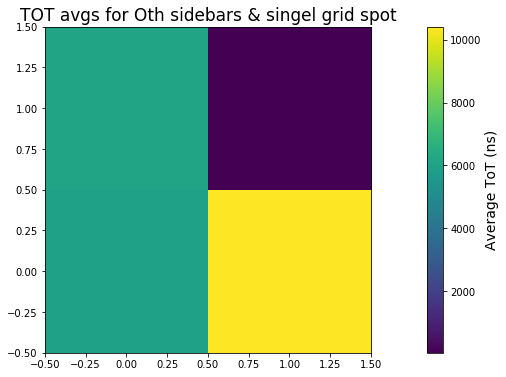

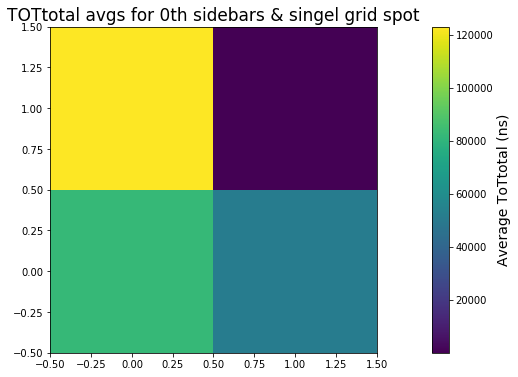

In [226]:
# reshape and plot data
# plt.figure(figsize = (8,8))
TOTavgs = [5987.0528072682728, 10412.900563216159, 6089.60193080843, 44.44444444444444]
plt.imshow(np.array(TOTavgs).reshape(2,2), origin='lower')
plt.colorbar().set_label('Average ToT (ns)', fontsize=14)
plt.title('TOT avgs for Oth sidebars & singel grid spot', fontsize=17)
plt.show()

TOTToTalavgs = [82593.82400979992, 51545.200524373664, 123017.82553583775, 44.44444444444444]
plt.imshow(np.array(TOTToTalavgs).reshape(2,2), origin='lower')
plt.colorbar().set_label('Average ToTtotal (ns)', fontsize=14)
plt.title('TOTtotal avgs for 0th sidebars & singel grid spot', fontsize=17)
plt.show()
# plt.savefig('ClusterSizeAvgs8x8_10s_1012020_114131-1_cent.png',  bbox_inches='tight')

'Tue Oct 13 15:09:55 2020'

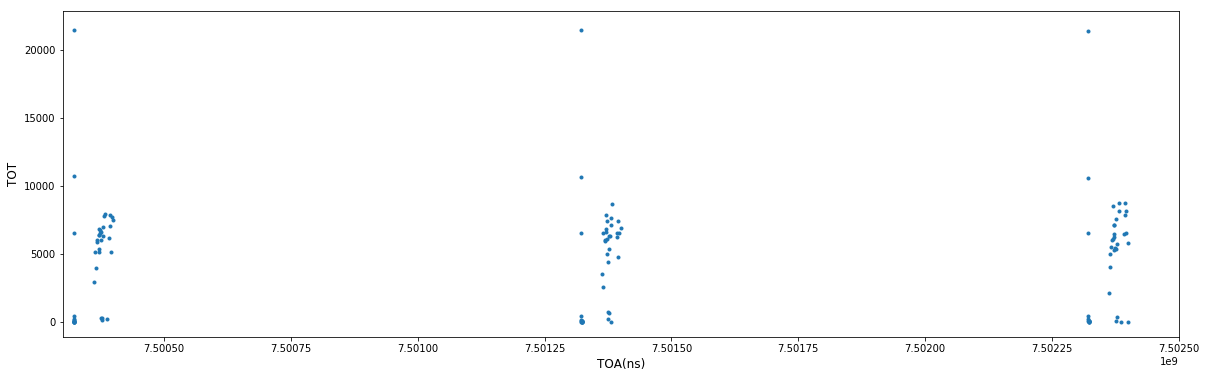

In [207]:
# r1 = t1[len(t1)//2:]/4096*25
# f1 = a1[len(a1)//2:]
plt.rcParams["figure.figsize"] = (20,6)
#len(t) = 8550085 
#
#plt.scatter(r,f)
plt.plot(data1['#ToA']/4096.*25.,data1['#ToT[arb]'], '.')
#plt.plot(r, f, 'xb-')
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOA(ns)',fontsize = 12)
plt.ylabel('TOT',fontsize = 12)
# plt.xlim(0.75e10, 0.9e10)
# plt.xlim(1.002691450e9, 1.002691600e9)
plt.xlim(7.5003e9, 7.5025e9)
# ylim = ax.get_ylim()

# gate_df = data1.drop(data1[(data1['#ToA'] < Min) | (data1['#ToA'] > Max)].index)
# plt.vlines(3, ylim[0], ylim[1])
# plt.savefig('TOTvsTOA_256x256_8212020_025044-1_cent.png', bbox_inches='tight')
time.ctime()

In [142]:
7.500325e9-7.500321e9

4000.0

TypeError: slice indices must be integers or None or have an __index__ method

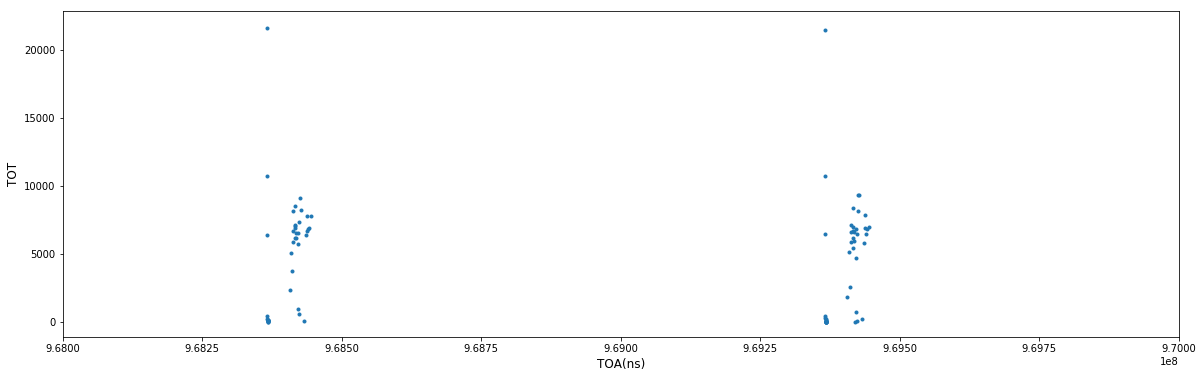

In [205]:
# r1 = t1[len(t1)//2:]/4096*25
# f1 = a1[len(a1)//2:]
plt.rcParams["figure.figsize"] = (20,6)
#len(t) = 8550085 
#
#plt.scatter(r,f)
plt.plot(data1['#ToA']/4096.*25.,data1['#ToT[arb]'], '.')
#plt.plot(r, f, 'xb-')
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOA(ns)',fontsize = 12)
plt.ylabel('TOT',fontsize = 12)
# plt.xlim(0.75e10, 0.9e10)
# plt.xlim(1.002691450e9, 1.002691600e9)
plt.xlim(0.968e9, 0.97e9)
# ylim = ax.get_ylim()
gate_lst = data1['#ToA'].tolist()/4096.*25.
print(len(gate_lst))
gatemin = data1['#ToA'].min()
gate_df = data1[data1['#ToA'] == gatemin]
inc = 1000000*4096./25.
# gatemax =
for i in data1['#ToA'].shape[0]:
    gate_df = gate_df.append(data1[data1['#ToA'] == gatemin + inc])
    inc = inc + 1000000*4096./25.
# gate_lst = gate_lst[::(1000000*4096./25.)]
print(len(gate_lst))
# gate_df = data1.drop(data1[(data1['#ToA'] < Min) | (data1['#ToA'] > Max)].index)
# plt.vlines(3, ylim[0], ylim[1])
# plt.savefig('TOTvsTOA_256x256_8212020_025044-1_cent.png', bbox_inches='tight')
time.ctime()

In [197]:
print(data1['#ToA'].min(), data1['#ToA'].max())
print(data1['#ToA'].min()/4096.*25., data1['#ToA'].max()/4096.*25.)

158657210368 1800007766784
968366762.5 10986375529.6875


'Thu Oct  8 15:35:10 2020'

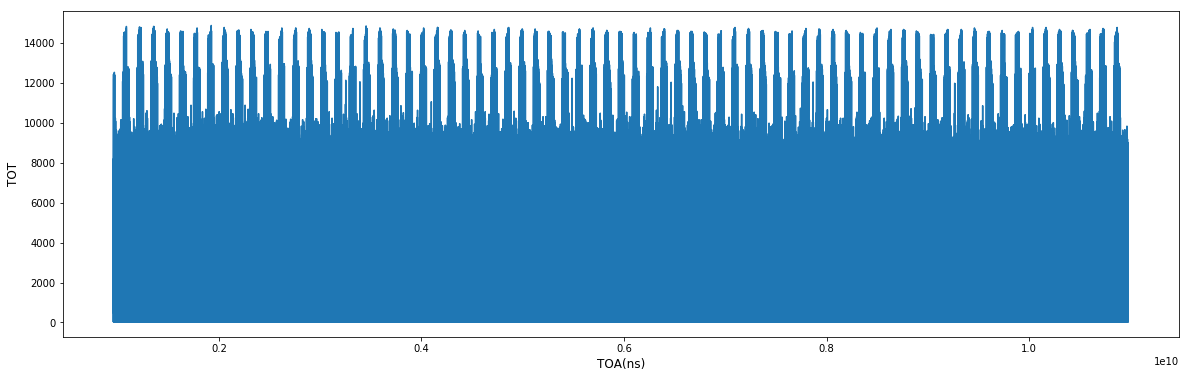

In [89]:
# r1 = t1[len(t1)//2:]/4096*25
# f1 = a1[len(a1)//2:]
plt.rcParams["figure.figsize"] = (20,6)
#len(t) = 8550085 
#
#plt.scatter(r,f)
plt.plot(data2['#ToA']/4096.*25.,data2['#ToT[arb]'], '')
#plt.plot(r, f, 'xb-')
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOA(ns)',fontsize = 12)
plt.ylabel('TOT',fontsize = 12)
# plt.xlim(0.75e10, 0.9e10)
# plt.xlim(1e9, 1.03e9)
# plt.savefig('TOTvsTOA_256x256_8212020_025447-1_cent.png', bbox_inches='tight')
time.ctime()

In [32]:
def min_max(data, grid_x_min, grid_x_max, grid_y_min, grid_y_max):
    """Returns DataFrame filtering values less than min or greater than max for two columns"""
    x_cond = (data['#Row'] <grid_x_min) | (data['#Row'] > grid_x_max)
    y_cond = (data['#Col'] < grid_y_min) | (data['#Col'] > grid_y_max)
    new_data = data.drop(data[x_cond | y_cond].index)
    return new_data

grid1_df = min_max(data1, GridX1min, GridX1max, GridY1min, GridY1max)

print(grid1_df.shape, type(grid1_df.iloc[0,0]), type(grid1_df.iloc[1,1]), time.ctime())
print(grid1_df.iloc[:3])

grid2_df = min_max(data2, GridX2min, GridX2max, GridY2min, GridY2max)

print(grid2_df.shape, type(grid2_df.iloc[0,0]), type(grid2_df.iloc[1,1]), time.ctime())
print(grid2_df.iloc[:3])

(472424, 6) <class 'numpy.int64'> <class 'numpy.int64'> Thu Oct 15 22:39:57 2020
      #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
3768   143   123  158657216256      10725           53375         NaN
3770   141   123  158657212672        175           53375         NaN
3771   140   124  158657213184        125           53375         NaN
(10298, 7) <class 'numpy.int64'> <class 'numpy.int64'> Thu Oct 15 22:39:57 2020
    #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  Unnamed: 6
2    143   123  158657216256      10725           53375         75         NaN
43   143   123  158821055232      10700           53400         77         NaN
89   143   123  158984893952      10775           52900         75         NaN


In [91]:
# ToAmin = (1.002691450e9)*4096./25.
# ToAmax = (1.002691600e9)*4096./25.
# grid1_1450_1600_df = grid1_df.drop(grid1_df[(grid1_df['#ToA'] < ToAmin) | (grid1_df['#ToA'] > ToAmax)].index)

# print(grid1_1450_1600_df.shape, type(grid1_1450_1600_df.iloc[0,0]), grid1_1450_1600_df.iloc[:1])

IndexError: single positional indexer is out-of-bounds

In [ ]:
# fig, ax0 = plt.subplots(ncols=1, figsize=(20, 4))
# (n, bins, patches) = plt.hist(grid1_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r')
# plt.title("TOA", fontsize = 12) # change the title
# plt.xlabel('TOA, ns',fontsize = 12)
# plt.ylabel('counts',fontsize = 12)
# # plt.xticks(bins[:20], rotation='vertical')
# plt.show()

In [34]:
#Define column segregations

C1min = GridX1min; C1max = C1min + 5;
C2min = C1max + 1; C2max = C2min + 4;
C3min = C2max + 1; C3max = C3min + 4;
C4min = C3max + 1; C4max = C4min + 5;
C5min = C4max + 1; C5max = C5min + 5;
C6min = C5max + 1; C6max = C6min + 5;
C7min = C6max + 1; C7max = C7min + 5;
C8min = C7max + 1; C8max = C8min + 5;
C1min = C1min - 1
C2min = C2min - 1
C3min = C3min - 1
C4min = C4min - 1
C5min = C5min - 1
C6min = C6min - 2
C7min = C7min - 2
C8min = C8min - 2
C1max = C1max - 1
C2max = C2max - 1
C3max = C3max - 1
C4max = C4max - 1
C5max = C5max - 1
C6max = C6max - 2
C7max = C7max - 2
C8max = C8max - 2

#Define Row segregations

R1min = GridY1min; R1max = R1min + 5;
R2min = R1max + 1; R2max = R2min + 4;
R3min = R2max + 1; R3max = R3min + 4;
R4min = R3max + 1; R4max = R4min + 5;
R5min = R4max + 1; R5max = R5min + 5;
R6min = R5max + 1; R6max = R6min + 5;
R7min = R6max + 1; R7max = R7min + 4;
R8min = R7max + 1; R8max = R8min + 5;
R1min = R1min - 1
R2min = R2min - 1
R3min = R3min - 1
R4min = R4min - 1
R5min = R5min - 2
R6min = R6min - 3
R7min = R7min - 4
R8min = R8min - 4
R1max = R1max - 1
R2max = R2max - 1
R3max = R3max - 1
R4max = R4max - 1
R5max = R5max - 2
R6max = R6max - 3
R7max = R7max - 4
R8max = R8max - 4

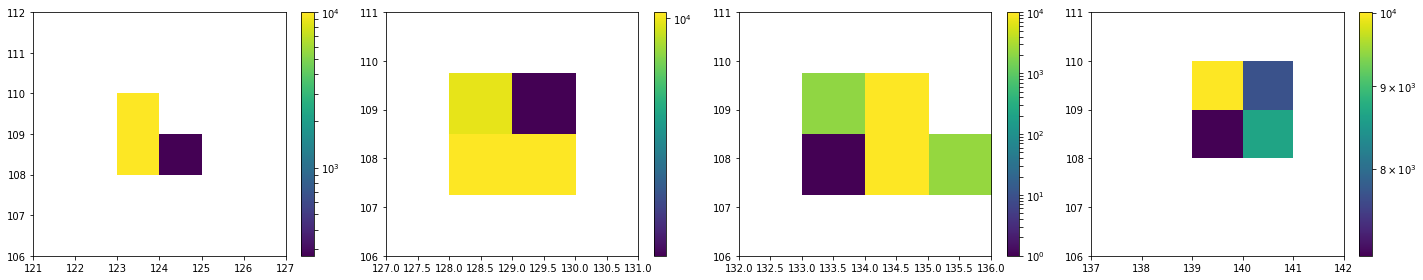

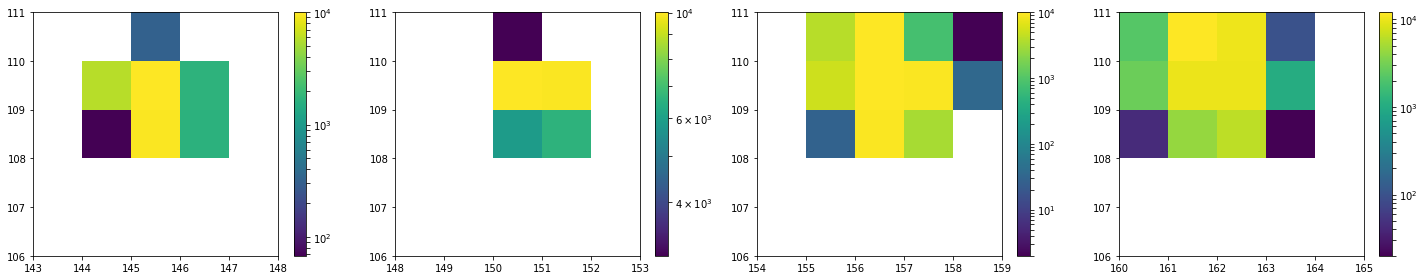

In [93]:
# Display Row 1
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax1.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = [C1max+1-C1min, R1max+1-R1min], range = [(C1min, C1max+1), (R1min, R1max+1)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

h = ax2.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C2max-C2min, range = [(C2min, C2max), (R1min, R1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax2)

h = ax3.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C3max-C3min, range = [(C3min, C3max), (R1min, R1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax3)

h = ax4.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C4max-C4min, range = [(C4min, C4max), (R1min, R1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax4)

fig.tight_layout()
plt.show()

fig, (ax5, ax6, ax7, ax8) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax5.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C5max-C5min, range = [(C5min, C5max), (R1min, R1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax5)

h = ax6.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C6max-C6min, range = [(C6min, C6max), (R1min, R1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax6)

h = ax7.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C7max-C7min, range = [(C7min, C7max), (R1min, R1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax7)

h = ax8.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C8max-C8min, range = [(C8min, C8max), (R1min, R1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax8)

fig.tight_layout()
plt.show()

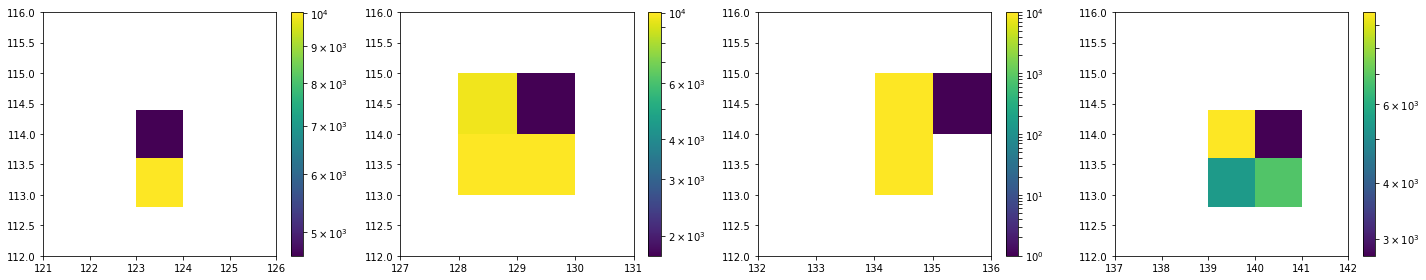

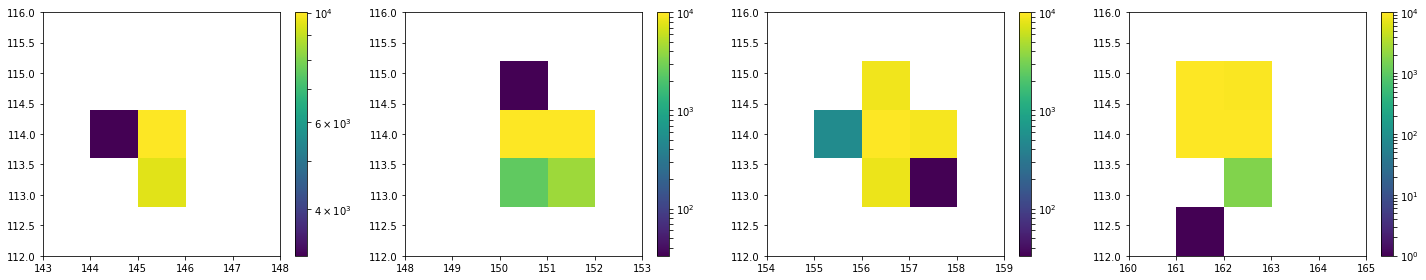

In [94]:
#Display Row 2

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax1.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C1max-C1min, range = [(C1min, C1max), (R2min, R2max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

h = ax2.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C2max-C2min, range = [(C2min, C2max), (R2min, R2max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax2)

h = ax3.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C3max-C3min, range = [(C3min, C3max), (R2min, R2max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax3)

h = ax4.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C4max-C4min, range = [(C4min, C4max), (R2min, R2max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax4)

fig.tight_layout()
plt.show()

fig, (ax5, ax6, ax7, ax8) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax5.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C5max-C5min, range = [(C5min, C5max), (R2min, R2max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax5)

h = ax6.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C6max-C6min, range = [(C6min, C6max), (R2min, R2max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax6)

h = ax7.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C7max-C7min, range = [(C7min, C7max), (R2min, R2max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax7)

h = ax8.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C8max-C8min, range = [(C8min, C8max), (R2min, R2max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax8)

fig.tight_layout()
plt.show()

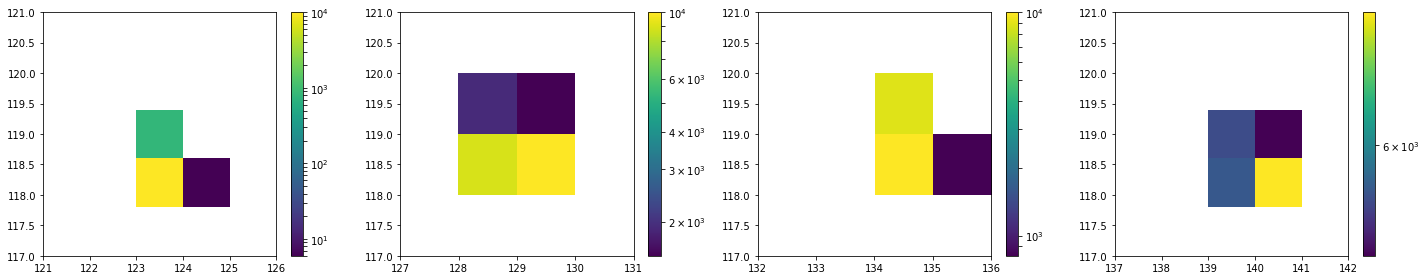

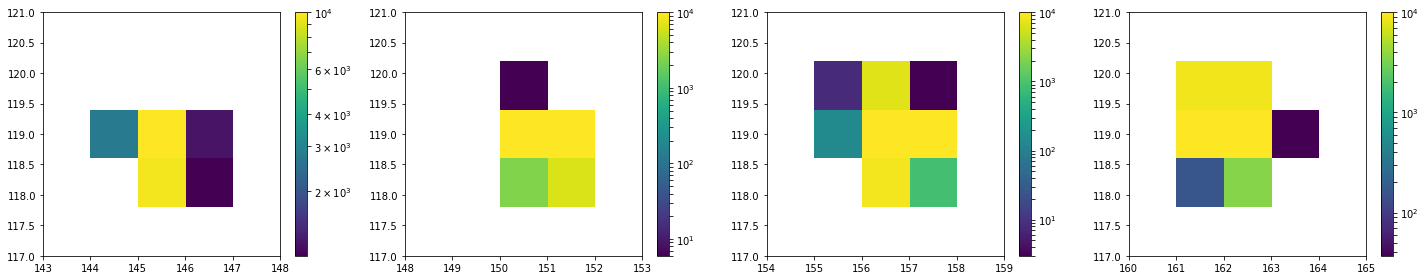

In [95]:
#Display Row 3

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax1.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C1max-C1min, range = [(C1min, C1max), (R3min, R3max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

h = ax2.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C2max-C2min, range = [(C2min, C2max), (R3min, R3max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax2)

h = ax3.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C3max-C3min, range = [(C3min, C3max), (R3min, R3max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax3)

h = ax4.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C4max-C4min, range = [(C4min, C4max), (R3min, R3max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax4)

fig.tight_layout()
plt.show()

fig, (ax5, ax6, ax7, ax8) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax5.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C5max-C5min, range = [(C5min, C5max), (R3min, R3max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax5)

h = ax6.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C6max-C6min, range = [(C6min, C6max), (R3min, R3max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax6)

h = ax7.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C7max-C7min, range = [(C7min, C7max), (R3min, R3max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax7)

h = ax8.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C8max-C8min, range = [(C8min, C8max), (R3min, R3max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax8)

fig.tight_layout()
plt.show()

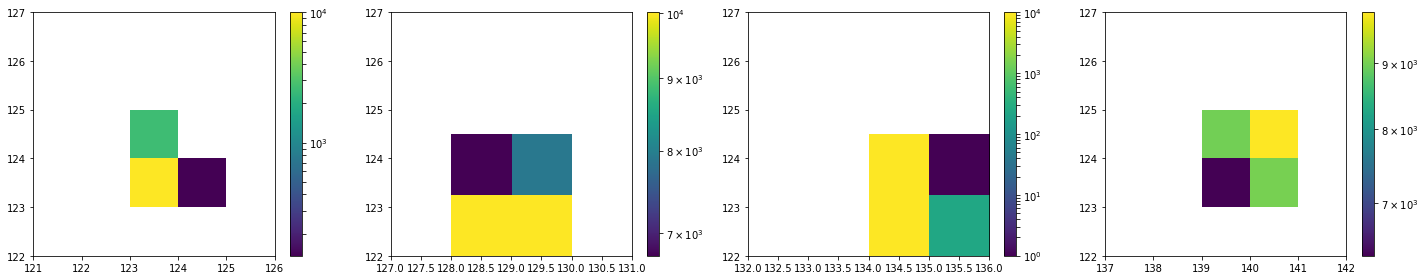

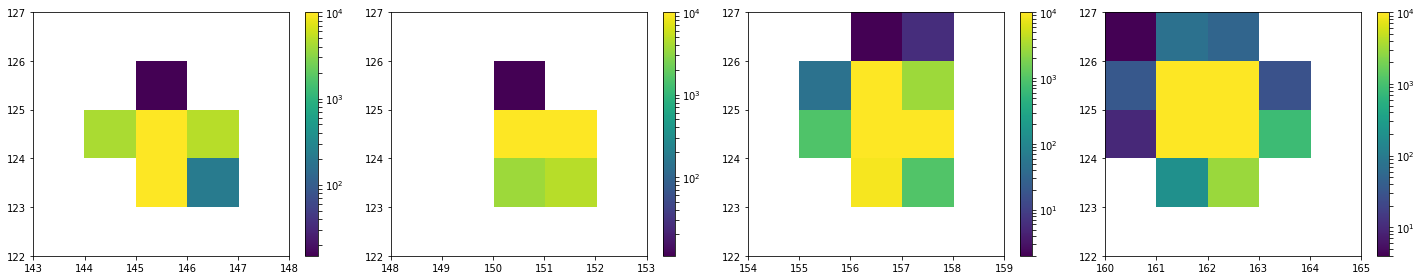

In [102]:
#Display Row 4

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax1.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C1max-C1min, range = [(C1min, C1max), (R4min, R4max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

h = ax2.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C2max-C2min, range = [(C2min, C2max), (R4min, R4max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax2)

h = ax3.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C3max-C3min, range = [(C3min, C3max), (R4min, R4max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax3)

h = ax4.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C4max-C4min, range = [(C4min, C4max), (R4min, R4max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax4)

fig.tight_layout()
plt.show()

fig, (ax5, ax6, ax7, ax8) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax5.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C5max-C5min, range = [(C5min, C5max), (R4min, R4max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax5)

h = ax6.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C6max-C6min, range = [(C6min, C6max), (R4min, R4max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax6)

h = ax7.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C7max-C7min, range = [(C7min, C7max), (R4min, R4max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax7)

h = ax8.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C8max-C8min, range = [(C8min, C8max), (R4min, R4max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax8)

fig.tight_layout()
plt.show()

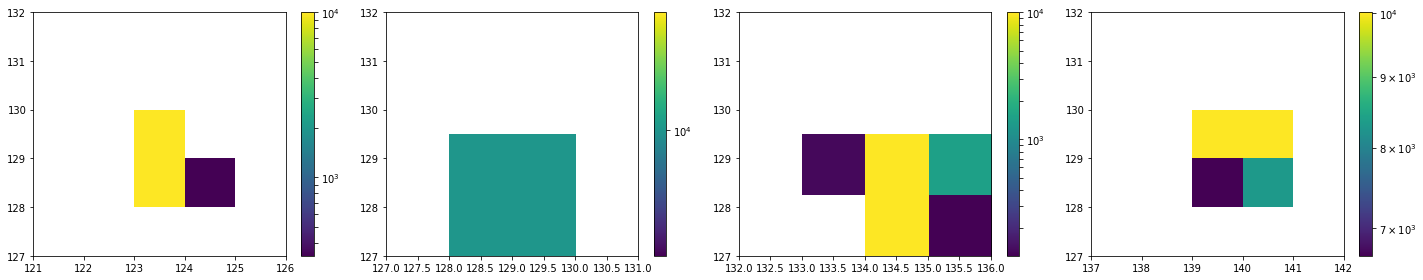

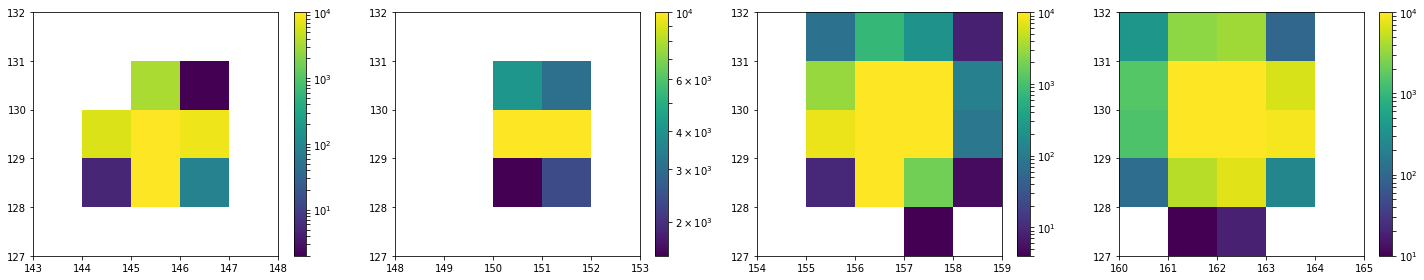

In [103]:
#Display Row 5

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax1.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C1max-C1min, range = [(C1min, C1max), (R5min, R5max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

h = ax2.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C2max-C2min, range = [(C2min, C2max), (R5min, R5max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax2)

h = ax3.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C3max-C3min, range = [(C3min, C3max), (R5min, R5max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax3)

h = ax4.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C4max-C4min, range = [(C4min, C4max), (R5min, R5max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax4)

fig.tight_layout()
plt.show()

fig, (ax5, ax6, ax7, ax8) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax5.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C5max-C5min, range = [(C5min, C5max), (R5min, R5max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax5)

h = ax6.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C6max-C6min, range = [(C6min, C6max), (R5min, R5max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax6)

h = ax7.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C7max-C7min, range = [(C7min, C7max), (R5min, R5max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax7)

h = ax8.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C8max-C8min, range = [(C8min, C8max), (R5min, R5max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax8)

fig.tight_layout()
plt.show()

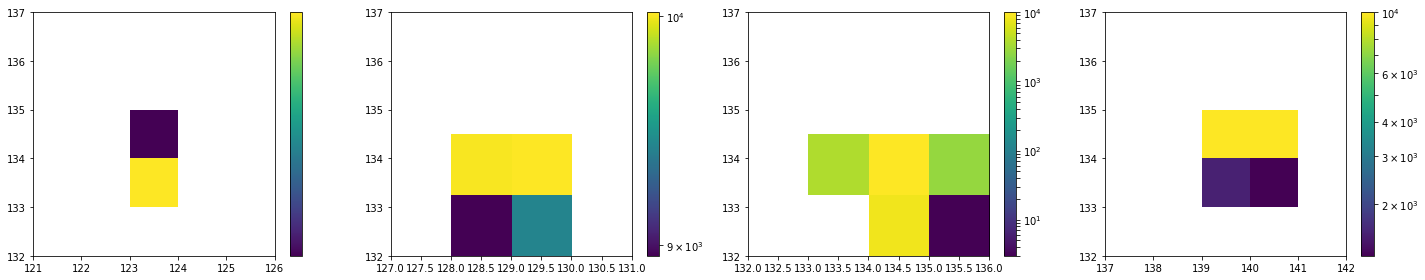

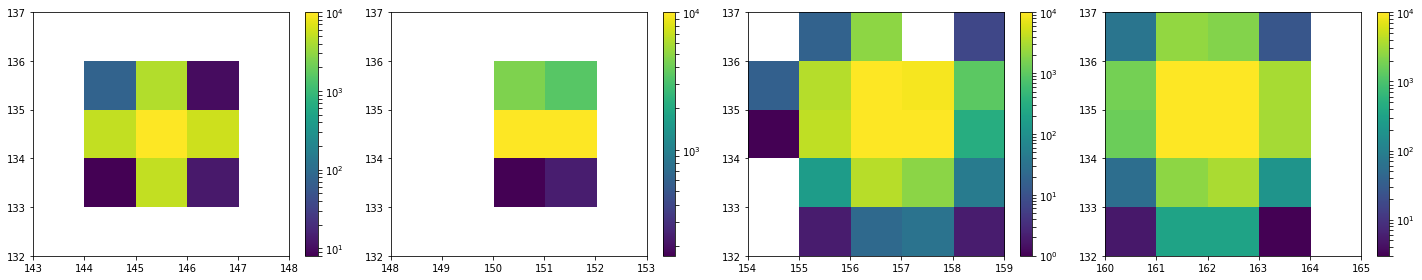

In [104]:
#Display Row 6

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax1.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C1max-C1min, range = [(C1min, C1max), (R6min, R6max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

h = ax2.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C2max-C2min, range = [(C2min, C2max), (R6min, R6max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax2)

h = ax3.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C3max-C3min, range = [(C3min, C3max), (R6min, R6max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax3)

h = ax4.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C4max-C4min, range = [(C4min, C4max), (R6min, R6max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax4)

fig.tight_layout()
plt.show()

fig, (ax5, ax6, ax7, ax8) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax5.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C5max-C5min, range = [(C5min, C5max), (R6min, R6max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax5)

h = ax6.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C6max-C6min, range = [(C6min, C6max), (R6min, R6max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax6)

h = ax7.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C7max-C7min, range = [(C7min, C7max), (R6min, R6max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax7)

h = ax8.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C8max-C8min, range = [(C8min, C8max), (R6min, R6max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax8)

fig.tight_layout()
plt.show()

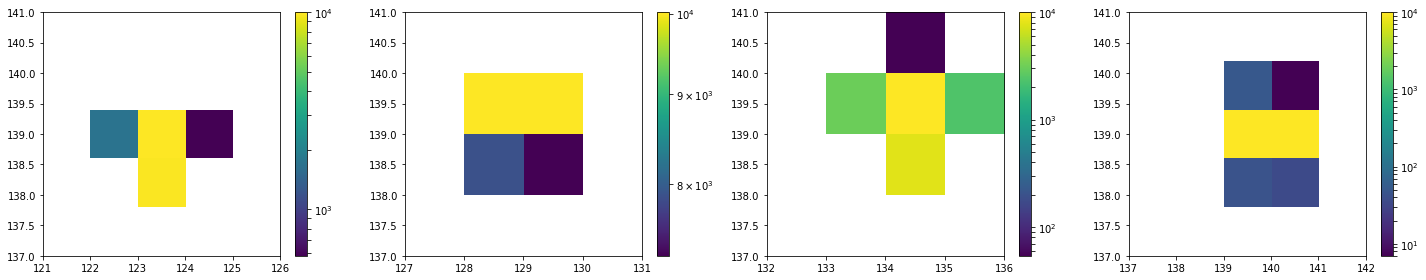

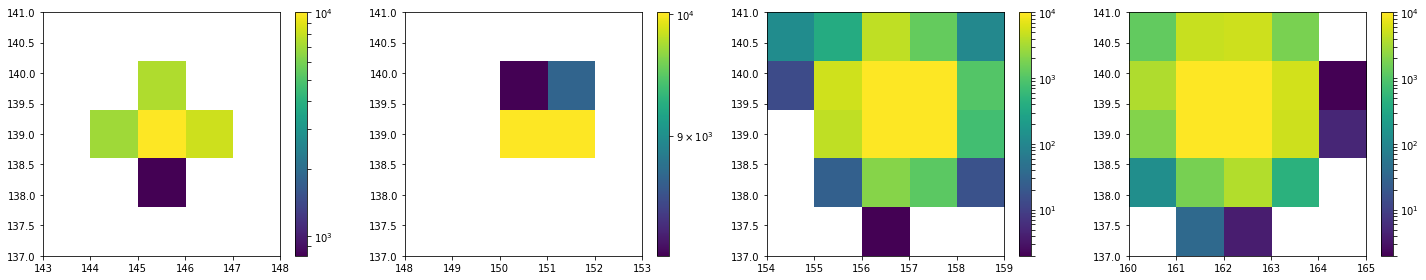

In [99]:
#Display Row 7

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax1.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C1max-C1min, range = [(C1min, C1max), (R7min, R7max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

h = ax2.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C2max-C2min, range = [(C2min, C2max), (R7min, R7max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax2)

h = ax3.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C3max-C3min, range = [(C3min, C3max), (R7min, R7max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax3)

h = ax4.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C4max-C4min, range = [(C4min, C4max), (R7min, R7max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax4)

fig.tight_layout()
plt.show()

fig, (ax5, ax6, ax7, ax8) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax5.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C5max-C5min, range = [(C5min, C5max), (R7min, R7max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax5)

h = ax6.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C6max-C6min, range = [(C6min, C6max), (R7min, R7max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax6)

h = ax7.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C7max-C7min, range = [(C7min, C7max), (R7min, R7max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax7)

h = ax8.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C8max-C8min, range = [(C8min, C8max), (R7min, R7max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax8)

fig.tight_layout()
plt.show()

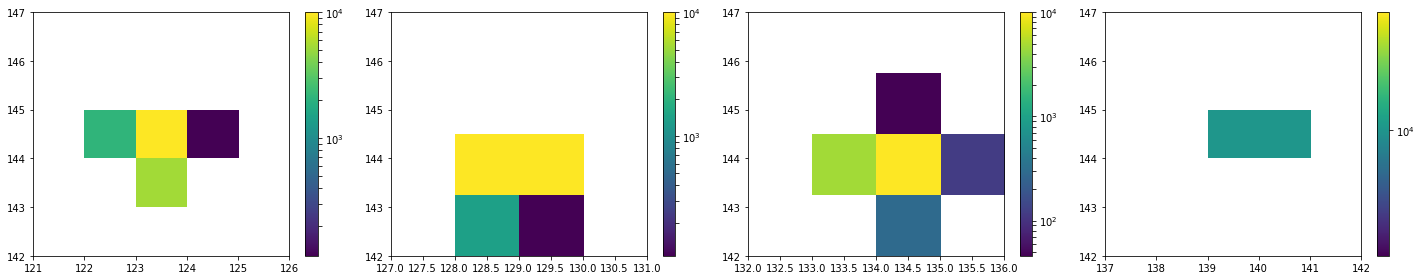

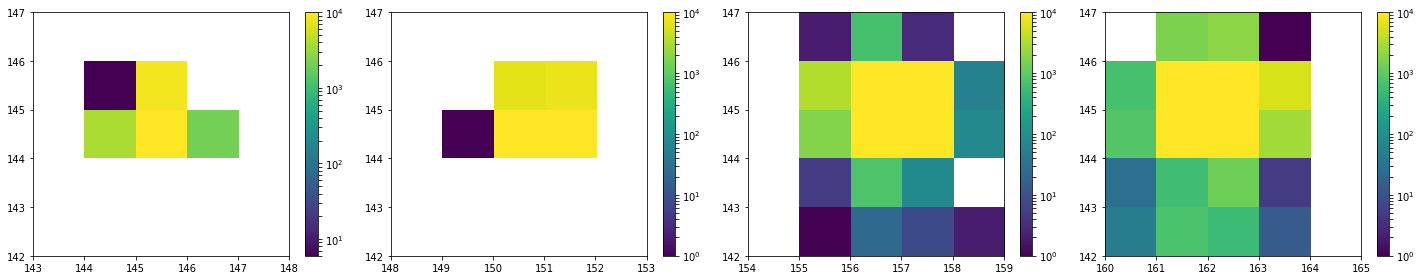

In [100]:
#Display Row 8

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax1.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C1max-C1min, range = [(C1min, C1max), (R8min, R8max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

h = ax2.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C2max-C2min, range = [(C2min, C2max), (R8min, R8max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax2)

h = ax3.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C3max-C3min, range = [(C3min, C3max), (R8min, R8max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax3)

h = ax4.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C4max-C4min, range = [(C4min, C4max), (R8min, R8max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax4)

fig.tight_layout()
plt.show()

fig, (ax5, ax6, ax7, ax8) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax5.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C5max-C5min, range = [(C5min, C5max), (R8min, R8max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax5)

h = ax6.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C6max-C6min, range = [(C6min, C6max), (R8min, R8max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax6)

h = ax7.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C7max-C7min, range = [(C7min, C7max), (R8min, R8max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax7)

h = ax8.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C8max-C8min, range = [(C8min, C8max), (R8min, R8max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax8)

fig.tight_layout()
plt.show()

In [992]:
Pt1_R1_df = min_max(grid1_df, C1min, C1max, R1min, R1max)
# Pt1_R1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt1_R1_df.shape, type(Pt1_R1_df.iloc[0,0]), type(Pt1_R1_df.iloc[1,1]), time.ctime())
print(Pt1_R1_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:53 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
1     153    68  157891257344       1225            2750          5   
72    153    68  158055096064       1275            2925          5   
143   153    68  158218934784       1300            2875          5   

     Unnamed: 6  
1           NaN  
72          NaN  
143         NaN  


In [993]:
Pt2_R1_df = min_max(grid1_df, C2min, C2max, R1min, R1max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt2_R1_df.shape, type(Pt2_R1_df.iloc[0,0]), type(Pt2_R1_df.iloc[1,1]), time.ctime())
print(Pt2_R1_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:53 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
9     153    74  157891257600        925            1700          4   
90    153    74  158055096576        925            1775          4   
145   153    74  158218935040        975            1825          4   

     Unnamed: 6  
9           NaN  
90          NaN  
145         NaN  


In [994]:
Pt3_R1_df = min_max(grid1_df, C3min, C3max, R1min, R1max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt3_R1_df.shape, type(Pt3_R1_df.iloc[0,0]), type(Pt3_R1_df.iloc[1,1]), time.ctime())
print(Pt3_R1_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:53 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
10    153    79  157891257856        725            1250          3   
81    153    79  158055096576        725            1325          3   
147   153    79  158218935296        750            1325          3   

     Unnamed: 6  
10          NaN  
81          NaN  
147         NaN  


In [995]:
Pt4_R1_df = min_max(grid1_df, C4min, C4max, R1min, R1max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt4_R1_df.shape, type(Pt4_R1_df.iloc[0,0]), type(Pt4_R1_df.iloc[1,1]), time.ctime())
print(Pt4_R1_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:53 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
15    153    85  157891257856        875            1825          4   
83    153    85  158055096576        875            1775          4   
157   153    85  158218935552        825            1700          4   

     Unnamed: 6  
15          NaN  
83          NaN  
157         NaN  


In [996]:
Pt5_R1_df = min_max(grid1_df, C5min, C5max, R1min, R1max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt5_R1_df.shape, type(Pt5_R1_df.iloc[0,0]), type(Pt5_R1_df.iloc[1,1]), time.ctime())
print(Pt5_R1_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:53 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
25    153    90  157891258368        475            1025          3   
103   153    90  158055097088        525            1125          3   
178   153    90  158218936064        500            1075          3   

     Unnamed: 6  
25          NaN  
103         NaN  
178         NaN  


In [997]:
Pt6_R1_df = min_max(grid1_df, C6min, C6max, R1min, R1max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt6_R1_df.shape, type(Pt6_R1_df.iloc[0,0]), type(Pt6_R1_df.iloc[1,1]), time.ctime())
print(Pt6_R1_df.iloc[:3])

(9979, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:54 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
55    154    96  157891263488        175             650          3   
127   154    96  158055099392        125             625          3   
200   154    96  158218938112        200             725          3   

     Unnamed: 6  
55          NaN  
127         NaN  
200         NaN  


In [998]:
Pt7_R1_df = min_max(grid1_df, C7min, C7max, R1min, R1max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt7_R1_df.shape, type(Pt7_R1_df.iloc[0,0]), type(Pt7_R1_df.iloc[1,1]), time.ctime())
print(Pt7_R1_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:54 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
19    154   101  157891257856        675            2175          6   
86    154   101  158055096576        650            2025          6   
154   154   101  158218935296        675            2000          5   

     Unnamed: 6  
19          NaN  
86          NaN  
154         NaN  


In [999]:
Pt8_R1_df = min_max(grid1_df, C8min, C8max, R1min, R1max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt8_R1_df.shape, type(Pt8_R1_df.iloc[0,0]), type(Pt8_R1_df.iloc[1,1]), time.ctime())
print(Pt8_R1_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:54 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
0     154   106  157891256832       1025            4975          8   
71    154   106  158055095552       1075            5000          8   
142   154   106  158218934528       1075            5175          8   

     Unnamed: 6  
0           NaN  
71          NaN  
142         NaN  


In [1000]:
Pt1_R2_df = min_max(grid1_df, C1min, C1max, R2min, R2max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt1_R2_df.shape, type(Pt1_R2_df.iloc[0,0]), type(Pt1_R2_df.iloc[1,1]), time.ctime())
print(Pt1_R2_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:54 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
7     158    68  157891257600        925            1575          4   
87    158    68  158055096576        900            1525          3   
155   158    68  158218935296        900            1625          4   

     Unnamed: 6  
7           NaN  
87          NaN  
155         NaN  


In [1001]:
Pt2_R2_df = min_max(grid1_df, C2min, C2max, R2min, R2max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt2_R2_df.shape, type(Pt2_R2_df.iloc[0,0]), type(Pt2_R2_df.iloc[1,1]), time.ctime())
print(Pt2_R2_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:54 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
33    158    74  157891258368        625            1100          3   
106   158    74  158055097088        650            1000          3   
171   158    74  158218935808        600             975          3   

     Unnamed: 6  
33          NaN  
106         NaN  
171         NaN  


In [1002]:
Pt3_R2_df = min_max(grid1_df, C3min, C3max, R2min, R2max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt3_R2_df.shape, type(Pt3_R2_df.iloc[0,0]), type(Pt3_R2_df.iloc[1,1]), time.ctime())
print(Pt3_R2_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:54 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
39    158    79  157891258624        500             500          1   
112   158    79  158055097344        525             800          3   
184   158    79  158218936320        475             700          3   

     Unnamed: 6  
39          NaN  
112         NaN  
184         NaN  


In [1003]:
Pt4_R2_df = min_max(grid1_df, C4min, C4max, R2min, R2max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt4_R2_df.shape, type(Pt4_R2_df.iloc[0,0]), type(Pt4_R2_df.iloc[1,1]), time.ctime())
print(Pt4_R2_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:54 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
32    158    85  157891258368        500             950          3   
97    158    85  158055096832        525            1000          4   
170   158    85  158218935808        550            1025          3   

     Unnamed: 6  
32          NaN  
97          NaN  
170         NaN  


In [1004]:
Pt5_R2_df = min_max(grid1_df, C5min, C5max, R2min, R2max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt5_R2_df.shape, type(Pt5_R2_df.iloc[0,0]), type(Pt5_R2_df.iloc[1,1]), time.ctime())
print(Pt5_R2_df.iloc[:3])

(10015, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:54 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
50    158    90  157891258880        375             725          3   
124   158    90  158055097856        400             625          2   
190   158    90  158218936576        350             575          2   

     Unnamed: 6  
50          NaN  
124         NaN  
190         NaN  


In [1005]:
Pt6_R2_df = min_max(grid1_df, C6min, C6max, R2min, R2max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt6_R2_df.shape, type(Pt6_R2_df.iloc[0,0]), type(Pt6_R2_df.iloc[1,1]), time.ctime())
print(Pt6_R2_df.iloc[:3])

(10013, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:55 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
61    158    96  157891259904        300             500          3   
132   158    96  158055098880        275             500          3   
202   159    96  158218939136        200             575          3   

     Unnamed: 6  
61          NaN  
132         NaN  
202         NaN  


In [1006]:
Pt7_R2_df = min_max(grid1_df, C7min, C7max, R2min, R2max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt7_R2_df.shape, type(Pt7_R2_df.iloc[0,0]), type(Pt7_R2_df.iloc[1,1]), time.ctime())
print(Pt7_R2_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:55 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
29    158   101  157891258368        475            1225          4   
109   158   101  158055097344        475            1225          4   
181   159   101  158218936320        450            1025          3   

     Unnamed: 6  
29          NaN  
109         NaN  
181         NaN  


In [1007]:
Pt8_R2_df = min_max(grid1_df, C8min, C8max, R2min, R2max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt8_R2_df.shape, type(Pt8_R2_df.iloc[0,0]), type(Pt8_R2_df.iloc[1,1]), time.ctime())
print(Pt8_R2_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:55 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
13    159   106  157891257856        550            2300          6   
73    159   106  158055096576        550            2500          6   
151   159   106  158218935296        525            2300          6   

     Unnamed: 6  
13          NaN  
73          NaN  
151         NaN  


In [1008]:
Pt1_R3_df = min_max(grid1_df, C1min, C1max, R3min, R3max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt1_R3_df.shape, type(Pt1_R3_df.iloc[0,0]), type(Pt1_R3_df.iloc[1,1]), time.ctime())
print(Pt1_R3_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:55 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
5     163    68  157891257600        650            1200          3   
80    163    68  158055096320        675            1250          4   
153   163    68  158218935296        650            1125          3   

     Unnamed: 6  
5           NaN  
80          NaN  
153         NaN  


In [1009]:
Pt2_R3_df = min_max(grid1_df, C2min, C2max, R3min, R3max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt2_R3_df.shape, type(Pt2_R3_df.iloc[0,0]), type(Pt2_R3_df.iloc[1,1]), time.ctime())
print(Pt2_R3_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:55 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
30    163    74  157891258368        525             750          2   
101   163    74  158055097088        525             725          2   
168   163    74  158218935808        525             750          2   

     Unnamed: 6  
30          NaN  
101         NaN  
168         NaN  


In [1010]:
Pt3_R3_df = min_max(grid1_df, C3min, C3max, R3min, R3max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt3_R3_df.shape, type(Pt3_R3_df.iloc[0,0]), type(Pt3_R3_df.iloc[1,1]), time.ctime())
print(Pt3_R3_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:55 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
37    163    79  157891258624        350             350          1   
115   163    79  158055097600        350             350          1   
182   163    79  158218936320        375             400          2   

     Unnamed: 6  
37          NaN  
115         NaN  
182         NaN  


In [1011]:
Pt4_R3_df = min_max(grid1_df, C4min, C4max, R3min, R3max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt4_R3_df.shape, type(Pt4_R3_df.iloc[0,0]), type(Pt4_R3_df.iloc[1,1]), time.ctime())
print(Pt4_R3_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:55 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
42    163    85  157891258624        450             650          2   
116   163    85  158055097600        400             525          2   
183   163    85  158218936320        400             525          2   

     Unnamed: 6  
42          NaN  
116         NaN  
183         NaN  


In [1012]:
Pt5_R3_df = min_max(grid1_df, C5min, C5max, R3min, R3max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt5_R3_df.shape, type(Pt5_R3_df.iloc[0,0]), type(Pt5_R3_df.iloc[1,1]), time.ctime())
print(Pt5_R3_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:56 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
58    163    90  157891259648        325             525          2   
129   163    90  158055098368        325             525          2   
201   163    90  158218937600        325             525          2   

     Unnamed: 6  
58          NaN  
129         NaN  
201         NaN  


In [1013]:
Pt6_R3_df = min_max(grid1_df, C6min, C6max, R3min, R3max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt6_R3_df.shape, type(Pt6_R3_df.iloc[0,0]), type(Pt6_R3_df.iloc[1,1]), time.ctime())
print(Pt6_R3_df.iloc[:3])

(9957, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:56 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
56    163    96  157891259648        275             275          1   
133   163    96  158055099392        250             250          1   
211   163    96  158218939392        250             250          1   

     Unnamed: 6  
56          NaN  
133         NaN  
211         NaN  


In [1014]:
Pt7_R3_df = min_max(grid1_df, C7min, C7max, R3min, R3max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt7_R3_df.shape, type(Pt7_R3_df.iloc[0,0]), type(Pt7_R3_df.iloc[1,1]), time.ctime())
print(Pt7_R3_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:56 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
21    163   101  157891258624        425            1075          3   
91    163   101  158055097088        375            1025          3   
163   163   101  158218936576        375             975          3   

     Unnamed: 6  
21          NaN  
91          NaN  
163         NaN  


In [1015]:
Pt8_R3_df = min_max(grid1_df, C8min, C8max, R3min, R3max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt8_R3_df.shape, type(Pt8_R3_df.iloc[0,0]), type(Pt8_R3_df.iloc[1,1]), time.ctime())
print(Pt8_R3_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:56 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
12    164   107  157891257856        650            1300          4   
74    164   107  158055096320        675            1300          3   
149   164   107  158218935296        650            1375          4   

     Unnamed: 6  
12          NaN  
74          NaN  
149         NaN  


In [1016]:
Pt1_R4_df = min_max(grid1_df, C1min, C1max, R4min, R4max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt1_R4_df.shape, type(Pt1_R4_df.iloc[0,0]), type(Pt1_R4_df.iloc[1,1]), time.ctime())
print(Pt1_R4_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:56 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
6     168    68  157891257600        825            1400          3   
78    168    68  158055096320        875            1550          4   
152   168    68  158218935296        825            1475          3   

     Unnamed: 6  
6           NaN  
78          NaN  
152         NaN  


In [1017]:
Pt2_R4_df = min_max(grid1_df, C2min, C2max, R4min, R4max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt2_R4_df.shape, type(Pt2_R4_df.iloc[0,0]), type(Pt2_R4_df.iloc[1,1]), time.ctime())
print(Pt2_R4_df.iloc[:3])

(9362, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:56 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
24    168    74  157891258112        600             850          2   
84    168    74  158055096576        675            1025          3   
160   168    74  158218935552        650            1050          3   

     Unnamed: 6  
24          NaN  
84          NaN  
160         NaN  


In [1018]:
Pt3_R4_df = min_max(grid1_df, C3min, C3max, R4min, R4max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt3_R4_df.shape, type(Pt3_R4_df.iloc[0,0]), type(Pt3_R4_df.iloc[1,1]), time.ctime())
print(Pt3_R4_df.iloc[:3])

(9599, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:56 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
40    168    79  157891258624        450             675          2   
92    168    79  158055096832        475             600          2   
164   168    79  158218935808        475             650          2   

     Unnamed: 6  
40          NaN  
92          NaN  
164         NaN  


In [1019]:
Pt4_R4_df = min_max(grid1_df, C4min, C4max, R4min, R4max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt4_R4_df.shape, type(Pt4_R4_df.iloc[0,0]), type(Pt4_R4_df.iloc[1,1]), time.ctime())
print(Pt4_R4_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:56 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
43    168    85  157891258624        550             750          2   
105   168    85  158055097088        600             825          2   
180   168    85  158218936064        550             775          2   

     Unnamed: 6  
43          NaN  
105         NaN  
180         NaN  


In [1020]:
Pt5_R4_df = min_max(grid1_df, C5min, C5max, R4min, R4max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt5_R4_df.shape, type(Pt5_R4_df.iloc[0,0]), type(Pt5_R4_df.iloc[1,1]), time.ctime())
print(Pt5_R4_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:57 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
46    168    90  157891258624        425             725          3   
122   168    90  158055097856        425             600          2   
194   168    90  158218936832        350             650          3   

     Unnamed: 6  
46          NaN  
122         NaN  
194         NaN  


In [1021]:
Pt6_R4_df = min_max(grid1_df, C6min, C6max, R4min, R4max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt6_R4_df.shape, type(Pt6_R4_df.iloc[0,0]), type(Pt6_R4_df.iloc[1,1]), time.ctime())
print(Pt6_R4_df.iloc[:3])

(9864, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:57 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
51    168    96  157891259136        300             300          1   
125   168    96  158055098112        250             250          1   
199   168    96  158218937344        275             275          1   

     Unnamed: 6  
51          NaN  
125         NaN  
199         NaN  


In [1022]:
Pt7_R4_df = min_max(grid1_df, C7min, C7max, R4min, R4max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt7_R4_df.shape, type(Pt7_R4_df.iloc[0,0]), type(Pt7_R4_df.iloc[1,1]), time.ctime())
print(Pt7_R4_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:57 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
36    168   101  157891258368        525            1175          4   
102   168   101  158055097088        525            1125          3   
177   168   101  158218936064        500            1050          3   

     Unnamed: 6  
36          NaN  
102         NaN  
177         NaN  


In [1023]:
Pt8_R4_df = min_max(grid1_df, C8min, C8max, R4min, R4max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt8_R4_df.shape, type(Pt8_R4_df.iloc[0,0]), type(Pt8_R4_df.iloc[1,1]), time.ctime())
print(Pt8_R4_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:57 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
20    169   107  157891257856        800            1450          3   
89    169   107  158055096576        900            1525          3   
162   169   107  158218935552        825            1475          3   

     Unnamed: 6  
20          NaN  
89          NaN  
162         NaN  


In [1024]:
Pt1_R5_df = min_max(grid1_df, C1min, C1max, R5min, R5max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt1_R5_df.shape, type(Pt1_R5_df.iloc[0,0]), type(Pt1_R5_df.iloc[1,1]), time.ctime())
print(Pt1_R5_df.iloc[:3])

(9986, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:57 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
8     173    68  157891257600        975            1575          3   
79    173    68  158055096320        975            1675          3   
146   173    68  158218935040       1025            1700          3   

     Unnamed: 6  
8           NaN  
79          NaN  
146         NaN  


In [1025]:
Pt2_R5_df = min_max(grid1_df, C2min, C2max, R5min, R5max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt2_R5_df.shape, type(Pt2_R5_df.iloc[0,0]), type(Pt2_R5_df.iloc[1,1]), time.ctime())
print(Pt2_R5_df.iloc[:3])

(8171, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:57 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
16    173    74  157891257856        675             950          2   
95    173    74  158055096832        675             925          2   
169   173    74  158218935808        650            1000          2   

     Unnamed: 6  
16          NaN  
95          NaN  
169         NaN  


In [1026]:
Pt3_R5_df = min_max(grid1_df, C3min, C3max, R5min, R5max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt3_R5_df.shape, type(Pt3_R5_df.iloc[0,0]), type(Pt3_R5_df.iloc[1,1]), time.ctime())
print(Pt3_R5_df.iloc[:3])

(7900, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:57 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
26    173    79  157891258368        450             600          2   
98    173    79  158055097088        500             675          2   
165   173    79  158218935808        475             725          2   

     Unnamed: 6  
26          NaN  
98          NaN  
165         NaN  


In [1027]:
Pt4_R5_df = min_max(grid1_df, C4min, C4max, R5min, R5max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt4_R5_df.shape, type(Pt4_R5_df.iloc[0,0]), type(Pt4_R5_df.iloc[1,1]), time.ctime())
print(Pt4_R5_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:57 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
23    173    85  157891258112        625             875          2   
94    173    85  158055096832        700             900          2   
158   173    85  158218935552        650             925          2   

     Unnamed: 6  
23          NaN  
94          NaN  
158         NaN  


In [1028]:
Pt5_R5_df = min_max(grid1_df, C5min, C5max, R5min, R5max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt5_R5_df.shape, type(Pt5_R5_df.iloc[0,0]), type(Pt5_R5_df.iloc[1,1]), time.ctime())
print(Pt5_R5_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:58 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
31    173    90  157891258368        450             950          3   
104   173    90  158055097088        500             925          3   
179   173    90  158218936064        475             925          3   

     Unnamed: 6  
31          NaN  
104         NaN  
179         NaN  


In [1029]:
Pt6_R5_df = min_max(grid1_df, C6min, C6max, R5min, R5max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt6_R5_df.shape, type(Pt6_R5_df.iloc[0,0]), type(Pt6_R5_df.iloc[1,1]), time.ctime())
print(Pt6_R5_df.iloc[:3])

(8750, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:58 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
57    173    96  157891259648        350             450          2   
128   173    96  158055098368        300             425          3   
196   173    96  158218937088        300             425          2   

     Unnamed: 6  
57          NaN  
128         NaN  
196         NaN  


In [1030]:
Pt7_R5_df = min_max(grid1_df, C7min, C7max, R5min, R5max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt7_R5_df.shape, type(Pt7_R5_df.iloc[0,0]), type(Pt7_R5_df.iloc[1,1]), time.ctime())
print(Pt7_R5_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:58 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
11    173   101  157891258112        600            1500          4   
93    173   101  158055096832        550            1450          4   
166   173   101  158218935808        550            1275          4   

     Unnamed: 6  
11          NaN  
93          NaN  
166         NaN  


In [1031]:
Pt8_R5_df = min_max(grid1_df, C8min, C8max, R5min, R5max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt8_R5_df.shape, type(Pt8_R5_df.iloc[0,0]), type(Pt8_R5_df.iloc[1,1]), time.ctime())
print(Pt8_R5_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:58 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
2     174   107  157891257600        825            1500          3   
75    174   107  158055096320        875            1600          3   
148   174   107  158218935296        900            1600          3   

     Unnamed: 6  
2           NaN  
75          NaN  
148         NaN  


In [1032]:
Pt1_R6_df = min_max(grid1_df, C1min, C1max, R6min, R6max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt1_R6_df.shape, type(Pt1_R6_df.iloc[0,0]), type(Pt1_R6_df.iloc[1,1]), time.ctime())
print(Pt1_R6_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:58 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
17    178    68  157891257856        650             925          2   
85    178    68  158055096576        675            1000          3   
159   178    68  158218935552        625             875          2   

     Unnamed: 6  
17          NaN  
85          NaN  
159         NaN  


In [1033]:
Pt2_R6_df = min_max(grid1_df, C2min, C2max, R6min, R6max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt2_R6_df.shape, type(Pt2_R6_df.iloc[0,0]), type(Pt2_R6_df.iloc[1,1]), time.ctime())
print(Pt2_R6_df.iloc[:3])

(9089, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:58 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
44    178    74  157891258624        450             700          2   
117   178    74  158055097600        450             650          2   
189   178    74  158218936576        425             650          2   

     Unnamed: 6  
44          NaN  
117         NaN  
189         NaN  


In [1034]:
Pt3_R6_df = min_max(grid1_df, C3min, C3max, R6min, R6max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt3_R6_df.shape, type(Pt3_R6_df.iloc[0,0]), type(Pt3_R6_df.iloc[1,1]), time.ctime())
print(Pt3_R6_df.iloc[:3])

(8098, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:58 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
52    178    79  157891259136        350             350          1   
120   178    79  158055097856        350             350          1   
191   178    79  158218936832        300             300          1   

     Unnamed: 6  
52          NaN  
120         NaN  
191         NaN  


In [1035]:
Pt4_R6_df = min_max(grid1_df, C4min, C4max, R6min, R6max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt4_R6_df.shape, type(Pt4_R6_df.iloc[0,0]), type(Pt4_R6_df.iloc[1,1]), time.ctime())
print(Pt4_R6_df.iloc[:3])

(7731, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:58 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
48    178    85  157891258880        450             675          2   
110   178    85  158055097344        475             625          2   
188   178    85  158218936576        425             575          2   

     Unnamed: 6  
48          NaN  
110         NaN  
188         NaN  


In [1036]:
Pt5_R6_df = min_max(grid1_df, C5min, C5max, R6min, R6max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt5_R6_df.shape, type(Pt5_R6_df.iloc[0,0]), type(Pt5_R6_df.iloc[1,1]), time.ctime())
print(Pt5_R6_df.iloc[:3])

(6997, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:58 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
62    178    90  157891259904        300             450          2   
131   178    90  158055098624        275             350          2   
197   178    90  158218937088        300             300          1   

     Unnamed: 6  
62          NaN  
131         NaN  
197         NaN  


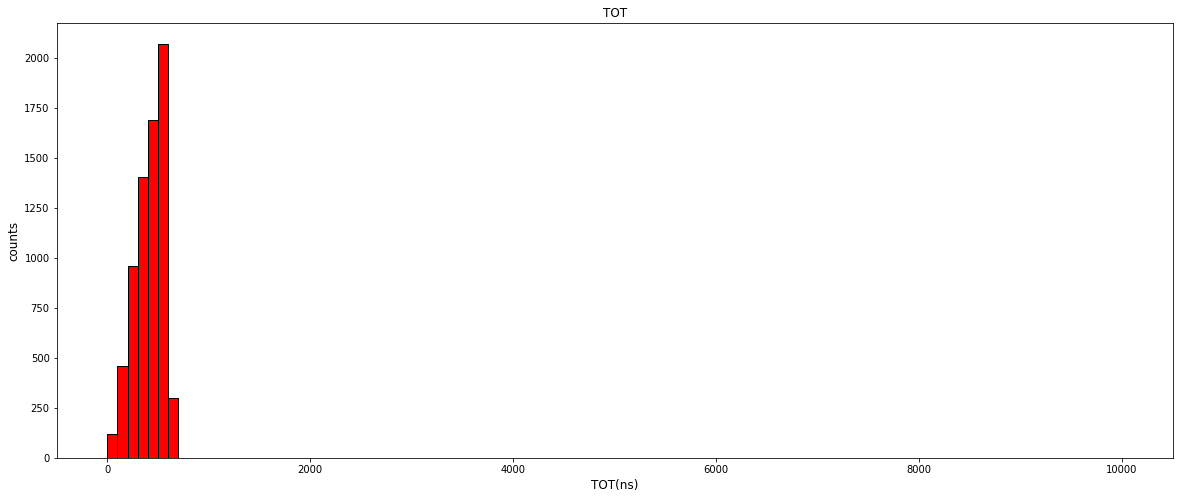

In [1204]:
fig, ax1 = plt.subplots(ncols=1, figsize=(20, 8))

nbins = 100

# ax0.hist(a, bins = 100, range = (0, 2500), color = 'r', ec = 'k')
# plt.title("TOT", fontsize = 12) # change the title
# plt.xlabel('TOT(ns)',fontsize = 12)
# plt.ylabel('counts',fontsize = 12)

plt.hist(Pt5_R6_df['#ToT[arb]'], bins= nbins, range = [0, 10000], color = 'r', ec = 'k')
plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOT(ns)',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
# plt.hist(Pt1_df['#ToT[arb]'], bins= nbins, range = [0, 20000], lw=3, histtype='step', label = 'file 2', color = 'red')

# plt.xlabel('ToT, ns')
# plt.legend()
plt.show()
# fig.savefig('TOT_Pt1-1_025044-1_cent_8212020.png',  bbox_inches='tight')

In [1037]:
Pt6_R6_df = min_max(grid1_df, C6min, C6max, R6min, R6max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt6_R6_df.shape, type(Pt6_R6_df.iloc[0,0]), type(Pt6_R6_df.iloc[1,1]), time.ctime())
print(Pt6_R6_df.iloc[:3])

(7360, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:59 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
60    178    96  157891259904        250             425          2   
130   178    96  158055098624        275             425          2   
208   178    96  158218938368        250             475          2   

     Unnamed: 6  
60          NaN  
130         NaN  
208         NaN  


In [1038]:
Pt7_R6_df = min_max(grid1_df, C7min, C7max, R6min, R6max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt7_R6_df.shape, type(Pt7_R6_df.iloc[0,0]), type(Pt7_R6_df.iloc[1,1]), time.ctime())
print(Pt7_R6_df.iloc[:3])

(8655, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:59 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
47    179   101  157891258880        350            1025          4   
118   179   101  158055097600        375             950          3   
185   179   101  158218936320        375             875          3   

     Unnamed: 6  
47          NaN  
118         NaN  
185         NaN  


In [1039]:
Pt8_R6_df = min_max(grid1_df, C8min, C8max, R6min, R6max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt8_R6_df.shape, type(Pt8_R6_df.iloc[0,0]), type(Pt8_R6_df.iloc[1,1]), time.ctime())
print(Pt8_R6_df.iloc[:3])

(10019, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:59 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
34    179   107  157891258368        725            1150          3   
88    179   107  158055096576        725            1150          3   
172   179   107  158218935808        625             925          3   

     Unnamed: 6  
34          NaN  
88          NaN  
172         NaN  


In [1040]:
Pt1_R7_df = min_max(grid1_df, C1min, C1max, R7min, R7max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt1_R7_df.shape, type(Pt1_R7_df.iloc[0,0]), type(Pt1_R7_df.iloc[1,1]), time.ctime())
print(Pt1_R7_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:59 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
4     183    68  157891257600        900            1200          2   
77    183    68  158055096320        925            1200          2   
156   183    68  158218935552        875            1150          2   

     Unnamed: 6  
4           NaN  
77          NaN  
156         NaN  


In [1041]:
Pt2_R7_df = min_max(grid1_df, C2min, C2max, R7min, R7max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt2_R7_df.shape, type(Pt2_R7_df.iloc[0,0]), type(Pt2_R7_df.iloc[1,1]), time.ctime())
print(Pt2_R7_df.iloc[:3])

(9998, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:59 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
28    183    74  157891258368        650             900          2   
107   183    74  158055097344        650             925          2   
175   183    74  158218936064        625             900          2   

     Unnamed: 6  
28          NaN  
107         NaN  
175         NaN  


In [1042]:
Pt3_R7_df = min_max(grid1_df, C3min, C3max, R7min, R7max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt3_R7_df.shape, type(Pt3_R7_df.iloc[0,0]), type(Pt3_R7_df.iloc[1,1]), time.ctime())
print(Pt3_R7_df.iloc[:3])

(10016, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:59 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
38    183    79  157891258624        475             625          2   
114   183    79  158055097600        450             450          1   
187   183    79  158218936576        400             400          1   

     Unnamed: 6  
38          NaN  
114         NaN  
187         NaN  


In [1043]:
Pt4_R7_df = min_max(grid1_df, C4min, C4max, R7min, R7max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt4_R7_df.shape, type(Pt4_R7_df.iloc[0,0]), type(Pt4_R7_df.iloc[1,1]), time.ctime())
print(Pt4_R7_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:59 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
27    183    85  157891258368        500             900          3   
100   183    85  158055097088        475             825          3   
174   183    85  158218936064        425             825          3   

     Unnamed: 6  
27          NaN  
100         NaN  
174         NaN  


In [1044]:
Pt5_R7_df = min_max(grid1_df, C5min, C5max, R7min, R7max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt5_R7_df.shape, type(Pt5_R7_df.iloc[0,0]), type(Pt5_R7_df.iloc[1,1]), time.ctime())
print(Pt5_R7_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:09:59 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
59    183    90  157891259904        325             575          2   
119   183    90  158055097856        300             575          2   
195   183    90  158218937088        300             525          2   

     Unnamed: 6  
59          NaN  
119         NaN  
195         NaN  


In [1045]:
Pt6_R7_df = min_max(grid1_df, C6min, C6max, R7min, R7max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt6_R7_df.shape, type(Pt6_R7_df.iloc[0,0]), type(Pt6_R7_df.iloc[1,1]), time.ctime())
print(Pt6_R7_df.iloc[:3])

(9601, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:10:00 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
64    184    96  157891260160        200             600          3   
134   184    96  158055099392        250             625          3   
210   184    96  158218938880        225             425          3   

     Unnamed: 6  
64          NaN  
134         NaN  
210         NaN  


In [1046]:
Pt7_R7_df = min_max(grid1_df, C7min, C7max, R7min, R7max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt7_R7_df.shape, type(Pt7_R7_df.iloc[0,0]), type(Pt7_R7_df.iloc[1,1]), time.ctime())
print(Pt7_R7_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:10:00 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
22    184   101  157891258112        475            1025          3   
99    184   101  158055097088        500            1175          4   
167   184   101  158218935808        500            1075          3   

     Unnamed: 6  
22          NaN  
99          NaN  
167         NaN  


In [1047]:
Pt8_R7_df = min_max(grid1_df, C8min, C8max, R7min, R7max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt8_R7_df.shape, type(Pt8_R7_df.iloc[0,0]), type(Pt8_R7_df.iloc[1,1]), time.ctime())
print(Pt8_R7_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:10:00 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
3     184   107  157891257600       1000            1325          2   
76    184   107  158055096320       1000            1325          2   
144   184   107  158218935040       1025            1350          2   

     Unnamed: 6  
3           NaN  
76          NaN  
144         NaN  


In [43]:
Pt1_R8_df = min_max(grid1_df, C1min-8, C1max+7, R8min-8, R8max+7)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt1_R8_df.shape, type(Pt1_R8_df.iloc[0,0]), type(Pt1_R8_df.iloc[1,1]), time.ctime())
print(Pt1_R8_df.iloc[:3])

(472424, 6) <class 'numpy.int64'> <class 'numpy.int64'> Thu Oct 15 22:46:52 2020
      #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
3768   143   123  158657216256      10725           53375         NaN
3770   141   123  158657212672        175           53375         NaN
3771   140   124  158657213184        125           53375         NaN


Point C1R8


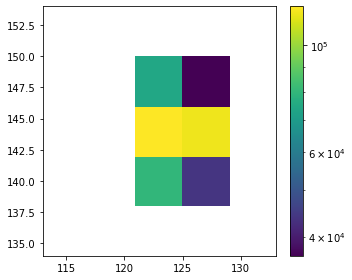

In [42]:
fig, ax0 = plt.subplots(ncols=1, figsize=(5, 4))

h = ax0.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = [C1max-C1min, R8max-R8min], range = [(C1min-8, C1max+7), (R8min-8, R8max+7)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax0)
fig.tight_layout()
print("Point C1R8")
plt.show()
# fig.savefig('Pt1-1_8212020_025044-1_cent.png')

'Thu Oct 15 22:46:59 2020'

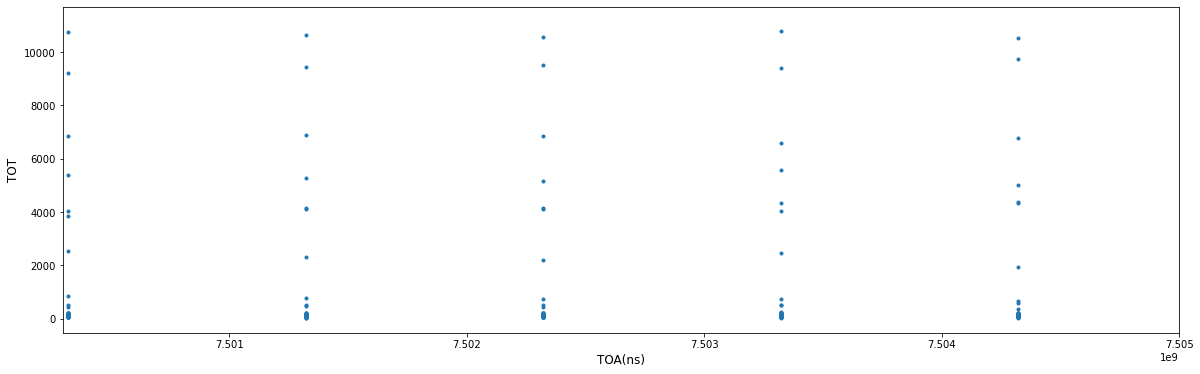

In [44]:
# r1 = t1[len(t1)//2:]/4096*25
# f1 = a1[len(a1)//2:]
plt.rcParams["figure.figsize"] = (20,6)
#len(t) = 8550085 
#
#plt.scatter(r,f)
plt.plot(Pt1_R8_df['#ToA']/4096.*25.,Pt1_R8_df['#ToT[arb]'], '.')
#plt.plot(r, f, 'xb-')
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOA(ns)',fontsize = 12)
plt.ylabel('TOT',fontsize = 12)
# plt.xlim(0.75e10, 0.9e10)
# plt.xlim(1.002691450e9, 1.002691600e9)
plt.xlim(7.5003e9, 7.505e9)
# plt.savefig('TOTvsTOA_256x256_8212020_025044-1_cent.png', bbox_inches='tight')
time.ctime()

### Not Centroided

'Thu Oct 15 22:47:04 2020'

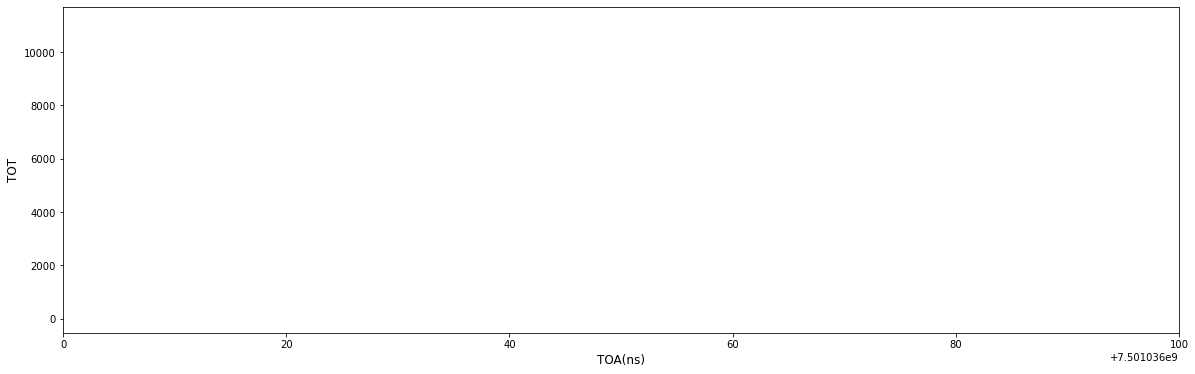

In [45]:
# r1 = t1[len(t1)//2:]/4096*25
# f1 = a1[len(a1)//2:]
plt.rcParams["figure.figsize"] = (20,6)
#len(t) = 8550085 
#
#plt.scatter(r,f)
plt.plot(Pt1_R8_df['#ToA']/4096.*25.,Pt1_R8_df['#ToT[arb]'], '.')
#plt.plot(r, f, 'xb-')
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOA(ns)',fontsize = 12)
plt.ylabel('TOT',fontsize = 12)
# plt.xlim(0.75e10, 0.9e10)
# plt.xlim(1.002691450e9, 1.002691600e9)
plt.xlim(7.5010e9+36000, 7.501036e9+100)
# plt.savefig('TOTvsTOA_256x256_8212020_025044-1_cent.png', bbox_inches='tight')
time.ctime()

In [209]:
# fig, ax1 = plt.subplots(ncols=1, figsize=(20, 8))

# nbins = 20

# # ax0.hist(a, bins = 100, range = (0, 2500), color = 'r', ec = 'k')
# # plt.title("TOT", fontsize = 12) # change the title
# # plt.xlabel('TOT(ns)',fontsize = 12)
# # plt.ylabel('counts',fontsize = 12)

# (n, bins, patches) = plt.hist(Pt1_R8_df['#Centroid'], bins= nbins, range = [0, 5], color = 'orange', ec = 'k')
# plt.title("Centroid", fontsize = 12) # change the title
# plt.xlabel('Centroid size (pixels)',fontsize = 12)
# plt.ylabel('counts',fontsize = 12)
# # plt.hist(Pt1_df['#ToT[arb]'], bins= nbins, range = [0, 20000], lw=3, histtype='step', label = 'file 2', color = 'red')
# plt.xticks(bins, rotation='vertical')
# # plt.xlabel('ToT, ns')
# # plt.legend()
# print('Min:', Pt1_R8_df['#Centroid'].min())
# print('Max:', Pt1_R8_df['#Centroid'].max())
# print('Avg:', Pt1_R8_df['#Centroid'].mean())
# plt.show()
# # fig.savefig('TOT_Pt1-1_025044-1_cent_8212020.png',  bbox_inches='tight')

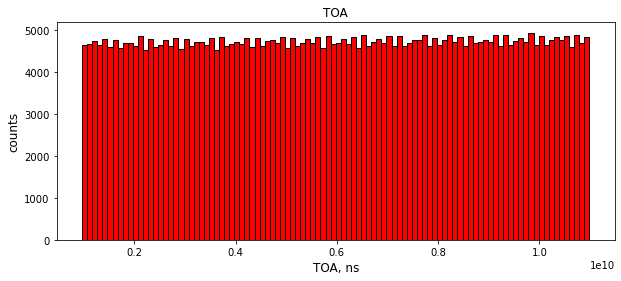

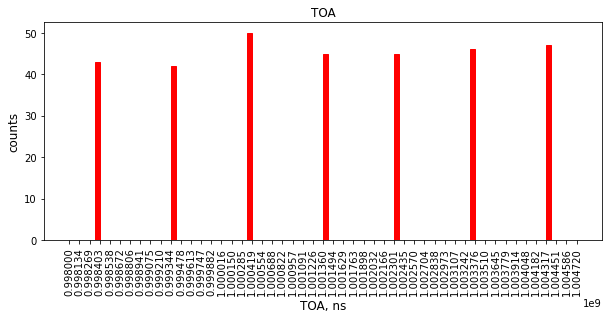

In [46]:
# ToAmin = (1.002691450e9)*4096./25.
# ToAmax = (1.002691600e9)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R8_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
(n, bins, patches) = plt.hist(Pt1_R8_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'r', range = (.998e9, 1.00472e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.xticks(bins[::2], rotation='vertical')
plt.show()

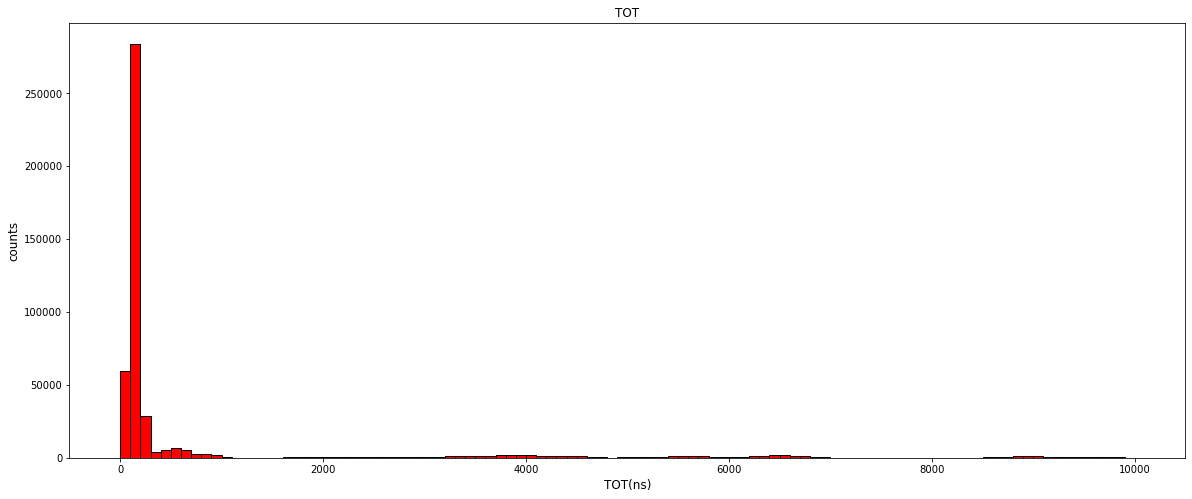

In [47]:
fig, ax1 = plt.subplots(ncols=1, figsize=(20, 8))

nbins = 100

# ax0.hist(a, bins = 100, range = (0, 2500), color = 'r', ec = 'k')
# plt.title("TOT", fontsize = 12) # change the title
# plt.xlabel('TOT(ns)',fontsize = 12)
# plt.ylabel('counts',fontsize = 12)

plt.hist(Pt1_R8_df['#ToT[arb]'], bins= nbins, range = [0, 10000], color = 'r', ec = 'k')
plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOT(ns)',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
# plt.hist(Pt1_df['#ToT[arb]'], bins= nbins, range = [0, 20000], lw=3, histtype='step', label = 'file 2', color = 'red')

# plt.xlabel('ToT, ns')
# plt.legend()
plt.show()
# fig.savefig('TOT_Pt1-1_025044-1_cent_8212020.png',  bbox_inches='tight')

In [1049]:
Pt2_R8_df = min_max(grid1_df, C2min, C2max, R8min, R8max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt2_R8_df.shape, type(Pt2_R8_df.iloc[0,0]), Pt2_R8_df.iloc[:1], time.ctime())
print()

(9568, 7) <class 'numpy.int64'>     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  Unnamed: 6
45   188    74  157891258624        450             700          2         NaN Mon Oct  5 17:10:00 2020



In [1050]:
Pt3_R8_df = min_max(grid1_df, C3min, C3max, R8min, R8max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt3_R8_df.shape, type(Pt3_R8_df.iloc[0,0]), type(Pt3_R8_df.iloc[1,1]), time.ctime())
print(Pt3_R8_df.iloc[:3])

(9515, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:10:00 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
53    188    79  157891259136        325             325          1   
121   188    79  158055097856        325             325          1   
198   188    79  158218937088        300             450          2   

     Unnamed: 6  
53          NaN  
121         NaN  
198         NaN  


In [1051]:
Pt4_R8_df = min_max(grid1_df, C4min, C4max, R8min, R8max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt4_R8_df.shape, type(Pt4_R8_df.iloc[0,0]), type(Pt4_R8_df.iloc[1,1]), time.ctime())
print(Pt4_R8_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:10:00 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
49    188    85  157891258880        425             825          3   
123   188    85  158055097856        375             775          3   
193   188    85  158218936832        325             525          2   

     Unnamed: 6  
49          NaN  
123         NaN  
193         NaN  


In [1052]:
Pt5_R8_df = min_max(grid1_df, C5min, C5max, R8min, R8max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt5_R8_df.shape, type(Pt5_R8_df.iloc[0,0]), type(Pt5_R8_df.iloc[1,1]), time.ctime())
print(Pt5_R8_df.iloc[:3])

(9479, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:10:00 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
63    189    90  157891259904        275             500          2   
137   188    90  158055101184        250             475          2   
205   188    90  158218938368        275             500          2   

     Unnamed: 6  
63          NaN  
137         NaN  
205         NaN  


In [1053]:
Pt6_R8_df = min_max(grid1_df, C6min, C6max, R8min, R8max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt6_R8_df.shape, type(Pt6_R8_df.iloc[0,0]), type(Pt6_R8_df.iloc[1,1]), time.ctime())
print(Pt6_R8_df.iloc[:3])

(9579, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:10:01 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
70    189    96  157891264768        150             150          1   
141   189    96  158055102208        175             175          1   
203   189    96  158218937856        275             275          1   

     Unnamed: 6  
70          NaN  
141         NaN  
203         NaN  


In [1054]:
Pt7_R8_df = min_max(grid1_df, C7min, C7max, R8min, R8max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt7_R8_df.shape, type(Pt7_R8_df.iloc[0,0]), type(Pt7_R8_df.iloc[1,1]), time.ctime())
print(Pt7_R8_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:10:01 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
35    189   101  157891258368        425             900          4   
108   189   101  158055097344        425            1000          4   
176   189   101  158218936064        450             975          4   

     Unnamed: 6  
35          NaN  
108         NaN  
176         NaN  


In [1055]:
Pt8_R8_df = min_max(grid1_df, C8min, C8max, R8min, R8max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt8_R8_df.shape, type(Pt8_R8_df.iloc[0,0]), type(Pt8_R8_df.iloc[1,1]), time.ctime())
print(Pt8_R8_df.iloc[:3])

(10020, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct  5 17:10:01 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  \
14    189   107  157891257856        950            1700          4   
82    189   107  158055096576       1025            1725          4   
150   189   107  158218935296       1000            1700          4   

     Unnamed: 6  
14          NaN  
82          NaN  
150         NaN  
